In [1]:
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None) # For printing a long sequence
pd.set_option('display.max_colwidth', None)  # Remove the limit on column width



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
##Defining a function for coloring NaN and Non-NaN values
def color_style(value):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for value
    greater than 5% NaNs, and green for safer values
    and black for anything otherwise.
    """
    if value>0:
        color= 'red'
    elif value==0:
        color='green'
    else:
        color='black'
    return 'color: %s' % color

In [ ]:
##Defining a function for missing value percentage dataframe: null_prcnt_df
def null_prcnt_df(data):
    df= data.copy()
    missing = pd.DataFrame(100*df.isnull().sum()/len(df.index))
    missing.rename(columns={0:'Null_Percentage'}, inplace=True)
    missing = pd.DataFrame(missing.Null_Percentage).sort_values(by='Null_Percentage',ascending=False).style.applymap(color_style)
    return missing

In [ ]:
##Function to display content in 'bold' within print statement
from IPython.display import Markdown, display
def printbold(string):
    return display(Markdown(string))

In [ ]:
##Define a function for other evaluation metrics:
def other_metrics_logistic_model(confusion):

    TP = confusion[1,1] # true positive
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    sensitivity= round((TP) / (TP+FN),4) #sensitivity of our logistic regression model
    specificity= round((TN) / (TN+FP),4) #specificity  of our logistic regression model
    FPR= round((FP) / (TN+FP),4)        #False Positive Rate - predicting churn when customer does not have churned
    positive_pred_val= round((TP) / (TP+FP),4)  #Positive predictive value
    negative_pred_val= round((TN) / (TN+ FN),4) #Negative predictive value
    misclass_rate = round((FN+FP)/(TP+TN+FP+FN),4)  #Misclassification rate

    metric_list= ['Sensitivity', 'Specificity', 'False Positive Rate','Positive Predictive Value','Negative Predictive Value', 'Misclassification Rate']
    metric_val = [sensitivity, specificity, FPR, positive_pred_val, negative_pred_val, misclass_rate]
    evaluation_metrics_df=pd.DataFrame({'Evaluation Metrics':metric_list, 'Value': metric_val})
    evaluation_metrics_df.set_index('Evaluation Metrics', inplace= True)
    return evaluation_metrics_df

In [ ]:
##Defining a function to plot confusion matrix

from sklearn import metrics
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm):
    """
    This function prints and plots the confusion matrix.
    """
    classes=['Not Churned','Churned']
    cmap=plt.cm.Reds
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion Matrix', fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes, rotation=90)
    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label', fontsize= 10)
    plt.xlabel('Predicted label', fontsize=10)


def print_model_metrics(y_test,y_pred,model_name):
    print(model_name+" Model Stats Scores Summary : ")
    cp = confusion_matrix(y_test,y_pred)
    plt.figure()
    plot_confusion_matrix(cp)
    plt.show()

In [ ]:
##Confirming the encoding of the 'telecom_churn_data.csv' file
import chardet
import os
file_path = os.path.join('/content/drive/MyDrive/Capstone project/telecom_churn_data.csv')
raw_data = open(file_path, 'rb').readline()

encoding = chardet.detect(raw_data)
print("File encoding details:\n",encoding)

File encoding details:
 {'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


## <font color='Blue'> Step 1: Reading and Understanding the Data

### <font color='Green'> Data Sourcing


In [ ]:
##Read the dataset
telecom_df = pd.read_csv('/content/drive/MyDrive/Capstone project/telecom_churn_data.csv')
telecom_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [ ]:
##Creating a copy of the data incase it is required later
telecom_df_orig = telecom_df.copy()

In [ ]:
##Check number of records and feature columns: 99999 records and 226 columns
telecom_df.shape

(99999, 226)

In [ ]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [ ]:
telecom_df.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7',
       'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7'

In [ ]:
telecom_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [ ]:
##Check null values in entire df
null_prcnt_df(telecom_df)

,Null_Percentage
arpu_3g_6,74.846748
night_pck_user_6,74.846748
total_rech_data_6,74.846748
arpu_2g_6,74.846748
max_rech_data_6,74.846748
fb_user_6,74.846748
av_rech_amt_data_6,74.846748
date_of_last_rech_data_6,74.846748
count_rech_2g_6,74.846748
count_rech_3g_6,74.846748


## <font color='Blue'> Step 2: Data Cleaning and Manipulation

In [ ]:
##Stripping off white_spaces from the column name(if any)
telecom_df = telecom_df.rename(columns= lambda x: x.strip(), inplace=False)

In [ ]:
##Checking and dropping duplicated records(if any)
telecom_df = telecom_df.drop_duplicates()

In [ ]:
##List of Incorrect name columns (as data dictionary says RECH: Recharge)
last_day_rech_cols = list(telecom_df.columns[telecom_df.columns.str.contains('last_day_rch_amt')])
last_day_rech_cols

['last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'last_day_rch_amt_9']

In [ ]:
##Correcting name of 'last_day_rch_amt_*' to 'last_day_rech_amt_*' columns (for months 6,7,8 and 9 respectively)
telecom_df = telecom_df.rename(columns= {'last_day_rch_amt_6':'last_day_rech_amt_6', 'last_day_rch_amt_7':'last_day_rech_amt_7',\
                                     'last_day_rch_amt_8':'last_day_rech_amt_8', 'last_day_rch_amt_9':'last_day_rech_amt_9'})
correct_last_day_rech_amt_cols = list(telecom_df.columns[telecom_df.columns.str.contains('last_day')])
correct_last_day_rech_amt_cols

['last_day_rech_amt_6',
 'last_day_rech_amt_7',
 'last_day_rech_amt_8',
 'last_day_rech_amt_9']

In churn prediction, we are given that there are three phases of customer lifecycle :<br><br>
(i) *The ‘good’ phase [Month 6 & 7]:* First two months <br>
(ii) *The ‘action’ phase [Month 8]:* Third month<br>
(iii) *The ‘churn’ phase [Month 9]:* Fourth Month<br>

**1. Derive new features (for filtering High-Value Customers)**

In [ ]:
##Columns containing recharge amount 'rech_amt' or recharge data 'rech_data' details
rech_amt_data_cols = telecom_df.columns[telecom_df.columns.str.contains('rech_amt|rech_data', regex=True)]
rech_amt_data_cols

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'last_day_rech_amt_6',
       'last_day_rech_amt_7', 'last_day_rech_amt_8', 'last_day_rech_amt_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')

**Observation:** The above mentioned columns correspond to `'rech_amt'` and `'rech_data'` features across months 6, 7 and 8 respectively:<br>
(i) Total recharge amount (calling)<br>
(ii) Maximum recharge amount (calling)<br>
(iii) Last day recharge amount<br>
(iv) Last date of Recharging the data<br>
(v) Total recharge for data<br>
(vi) Maximum recharge for data<br>
(vii) Average recharge amount for data<br>

In [ ]:
##Check null values in above mentioned columns, if any(column wise: missing value percentage)
rech_amt_data_df = telecom_df[rech_amt_data_cols]
null_prcnt_df(rech_amt_data_df)

,Null_Percentage
av_rech_amt_data_6,74.846748
max_rech_data_6,74.846748
date_of_last_rech_data_6,74.846748
total_rech_data_6,74.846748
av_rech_amt_data_7,74.428744
max_rech_data_7,74.428744
total_rech_data_7,74.428744
date_of_last_rech_data_7,74.428744
av_rech_amt_data_9,74.077741
date_of_last_rech_data_9,74.077741


**Observation:** Among the `'rech_amt'` and `'rech_data'` features, all the `data features` have around 74% missing values whereas the  `calling based recharge features` have no missing values.

In [ ]:
##Check stats of these columns in the dataframe
rech_amt_data_df.describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rech_amt_6,last_day_rech_amt_7,last_day_rech_amt_8,last_day_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,107.728207,101.943889,63.156252,59.385804,62.641716,43.901249,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,126.902505,125.375109,97.356649,95.915385,104.431816,90.809712,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,30.000000,28.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,98.000000,61.000000,30.000000,30.000000,30.000000,0.000000,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,144.000000,144.000000,110.000000,110.000000,130.000000,50.000000,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,35190.000000,40335.000000,45320.000000,37235.000000,4010.000000,4010.000000,4449.000000,3399.000000,4010.000000,4010.000000,4449.000000,3399.000000,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


**Observation:** For columns like `av_rech_amt_data_*` and `total_rech_data_*` (*months*) the minimum value is 1. Hence, we can impute the missing values by 0. (Considering there were `no recharges` done by the customer).

**Focus:** Records indicating **High-Value Customers**

In [ ]:
##Imputation of 'av_rech_amt_data_* and total_rech_data_*' column NaNs with 0 (for all the months 6, 7, 8 and 9 respectively)

telecom_df['av_rech_amt_data_6']= telecom_df['av_rech_amt_data_6'].fillna(0)
telecom_df['av_rech_amt_data_7']= telecom_df['av_rech_amt_data_7'].fillna(0)
telecom_df['av_rech_amt_data_8']= telecom_df['av_rech_amt_data_8'].fillna(0)
telecom_df['av_rech_amt_data_9']= telecom_df['av_rech_amt_data_9'].fillna(0)

telecom_df['total_rech_data_6']= telecom_df['total_rech_data_6'].fillna(0)
telecom_df['total_rech_data_7']= telecom_df['total_rech_data_7'].fillna(0)
telecom_df['total_rech_data_8']= telecom_df['total_rech_data_8'].fillna(0)
telecom_df['total_rech_data_9']= telecom_df['total_rech_data_9'].fillna(0)


In [ ]:
##Deriving features to subset the high-value customers.

##Calculating total data recharge amt for all the months 6, 7, 8 and 9 respectively.
telecom_df['total_rech_data_amt_6'] = (telecom_df['av_rech_amt_data_6'] * telecom_df['total_rech_data_6'])
telecom_df['total_rech_data_amt_7'] = (telecom_df['av_rech_amt_data_7'] * telecom_df['total_rech_data_7'])
telecom_df['total_rech_data_amt_8'] = (telecom_df['av_rech_amt_data_8'] * telecom_df['total_rech_data_8'])
telecom_df['total_rech_data_amt_9'] = (telecom_df['av_rech_amt_data_9'] * telecom_df['total_rech_data_9'])

In [ ]:
##Calculating the total average recharge for good phase: average of (calling recharge costs + data recharge costs) for month (6)
##and (7). Note: Good phase: month (6) and (7)

telecom_df['avg_total_rech_plus_data_amt_6_7'] = (telecom_df['total_rech_data_amt_6'] + telecom_df['total_rech_amt_6']+
                                                  telecom_df['total_rech_data_amt_7'] + telecom_df['total_rech_amt_7'])/2

**2. Filter High-Value customers**

`Criteria for filtering High-Value Customers:`<br> High-valued customers are those customers who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase)

Creating a variable `'avg_total_rech_plus_data_amt_6_7_70per'` to filter high-value customers.

In [ ]:
avg_total_rech_plus_data_amt_6_7_70per =  telecom_df['avg_total_rech_plus_data_amt_6_7'].quantile(0.7)
avg_total_rech_plus_data_amt_6_7_70per

478.0

In [ ]:
##Filtering high-value customers (>=70th percentile of avg recharge amount of the good phase)
telecom_hv = telecom_df.loc[(telecom_df.avg_total_rech_plus_data_amt_6_7 > avg_total_rech_plus_data_amt_6_7_70per)]
telecom_hv.shape

(29953, 231)

**Observation:** On filtering the high-value customers, we get about `29.9K observations`. These records of `high-value customers` shall be used for further analysis.

**(3) Deriving Churn column:**<br>

Tagging churners (churn=1, else 0) based on the fourth month(i.e. month of September(9)) and removing attributes corresponding to the churn phase.

In [ ]:
##Check for null values of features where we have no incoming and outgoing calls and no mobile internet usage in the churn phase.
churn_phase_cols = ['total_og_mou_9','total_ic_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']

churn_phase_cols_df = telecom_df[churn_phase_cols]
null_prcnt_df(churn_phase_cols_df)

,Null_Percentage
total_og_mou_9,0.000000
total_ic_mou_9,0.000000
vol_2g_mb_9,0.000000
vol_3g_mb_9,0.000000


**Observation:** There are no missing values in `'total_og_mou_9','total_ic_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9'` features of churn phase.

In [ ]:
##Criteria: High-valued customers with no incoming and outgoing calls and no mobile internet usage in the churn phase.
telecom_hv['total_usage_col_9'] = (telecom_hv['total_og_mou_9'] + telecom_hv['total_ic_mou_9'] +
                                   telecom_hv['vol_2g_mb_9'] + telecom_hv['vol_3g_mb_9'])

##Tagging churners based on 'total_usage_col_9'
telecom_hv['churn'] = np.where(telecom_hv['total_usage_col_9']== 0, 1, 0)
#(A value in 'total_usage_col_9' column indicates presence of calling and/or internet in 9th month; if absent i.e. total=0 implies churn i.e. 1)

print("Tagging churners [No. of Records]\n(churn=1, else 0):")
telecom_hv['churn'].value_counts()

Tagging churners [No. of Records]
(churn=1, else 0):


,count
churn,
0,27520
1,2433


In [ ]:
print("\nTagging churners (% of total)\n(churn=1, else 0):")
round(100*telecom_hv['churn'].value_counts()/len(telecom_hv.index),3)


Tagging churners (% of total)
(churn=1, else 0):


,count
churn,
0,91.877
1,8.123


In [ ]:
##Churn Rate
churn_rate = round(100*telecom_hv['churn'].sum()/len(telecom_hv.index),3)
print('Churn Rate(%):',churn_rate)
print("High-Valued Customers Dataset shape: ",telecom_hv.shape)

Churn Rate(%): 8.123
High-Valued Customers Dataset shape:  (29953, 233)


Based on the fourth month (9), **the percentage of customers that might churn are around `8.123%`**

In [ ]:
##List of columns in churn phase (month 9): (attributes containing '_9')
attributes_9 = list(telecom_hv.columns[telecom_hv.columns.str.contains('_9')])

##Also considering 'sep_vbc_3g' as this column also belongs to the churn phase (month 9: September)
attributes_9.append('sep_vbc_3g')

##Dropping churn phase (month 9) columns (except churn column)
telecom_hv.drop(attributes_9, axis=1, inplace=True)

telecom_hv.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rech_amt_6,last_day_rech_amt_7,last_day_rech_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,avg_total_rech_plus_data_amt_6_7,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,252.0,252.0,252.0,559.0,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,5

### <font color='Green'> EDA


**1. Dealing with features with constant value (constant variance), dealing with datatypes and handling missing values for rest of the features, etc.**

In [ ]:
##Removing columns that show constant variance (i.e. all values are constant or 0)
def remove_single_val_uniq_col(df):
    df_newsingle = df.copy()

    uniq_svcol = df_newsingle.nunique() ==1
    list_uniq_svcol = list(uniq_svcol[uniq_svcol.values== True].index)
    df_newsingle.drop(list_uniq_svcol, axis=1, inplace=True)
    print('Columns that are dropped are:\n{0}'.format(list_uniq_svcol))
    print('\nNumber of columns dropped:\n{0}'.format(len(list_uniq_svcol)))
    return df_newsingle

telecom_hv= remove_single_val_uniq_col(telecom_hv)

Columns that are dropped are:
['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']

Number of columns dropped:
13


In [ ]:
##Since this is not a time-series based analysis, we might also eliminate date columns as they won't be useful for our analysis
date_columns_list= list(telecom_hv.columns[telecom_hv.columns.str.contains('date')])
date_columns_list

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [ ]:
##Dropping the date columns
telecom_hv.drop(date_columns_list, axis=1, inplace=True)
telecom_hv.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rech_amt_6,last_day_rech_amt_7,last_day_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,avg_total_rech_plus_data_amt_6_7,churn
0,7000842753,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,252.0,252.0,252.0,559.0,1
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,0.0,0.0,1185.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,6

In [ ]:
telecom_hv.shape

(29953, 157)

In [ ]:
def hv_categorical_cols_unique(data):
    df = data.copy()

    unique_count = []
    unique_val = []
    col_list = []
    data_type = []

    for col in df.columns:
        if len(df[col].unique()) < 20:  # Set a threshold to check for the distinct values of potential categorical datatype columns
            col_list.append(col)
            data_type.append(df[col].dtype)
            unique_count.append(len(df[col].unique()))
            unique_val.append(df[col].unique())

    unique_df = pd.DataFrame({
        'Features': col_list,
        'Data Type': data_type,
        'Unique Count': unique_count,
        'Unique Values': [list(vals) for vals in unique_val]  # Use list to store unique values
    })

    unique_df.set_index('Features', inplace=True)
    sorted_df = unique_df.sort_values(by='Unique Count', ascending=True)
    return sorted_df

def printbold(text):
    display(Markdown(text))

printbold("**Checking for potential categorical datatype columns:**")
telecom_hv = pd.read_csv('/content/drive/MyDrive/Capstone project/telecom_churn_data.csv')  # Load your data here
hv_categorical_cols_unique(data=telecom_hv)


**Checking for potential categorical datatype columns:**

,Data Type,Unique Count,Unique Values
Features,,,
circle_id,int64,1,[109]
last_date_of_month_6,object,1,[6/30/2014]
std_ic_t2o_mou_8,float64,2,"[0.0, nan]"
std_ic_t2o_mou_7,float64,2,"[nan, 0.0]"
std_ic_t2o_mou_6,float64,2,"[nan, 0.0]"
std_og_t2c_mou_9,float64,2,"[nan, 0.0]"
std_og_t2c_mou_8,float64,2,"[0.0, nan]"
std_og_t2c_mou_7,float64,2,"[nan, 0.0]"
std_ic_t2o_mou_9,float64,2,"[nan, 0.0]"


**2. Extracting meaningful insights from EDA:**

In [ ]:
telecom_hv.describe(percentiles= [0,0.01,0.1,0.25,0.5,0.75,0.9,0.95,0.99,0.999])

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [ ]:
##Creating a function for boxplots for features belonging to months (6), (7) and (8) respectively with churn and no churn hue.
##(0: Not Churned (Retention), 1: Churned)

def plot_boxplots_6_7_8(feature):  ##Note: Showfliers: False (Suppresses the effect of outliers on the graphs.)
    plt.figure(figsize=(24,10), dpi=250)
    sns.set_style("whitegrid")
    df = telecom_hv.copy()

    plt.subplot(1,3,1)
    ax_11= sns.boxplot(data=df, y=feature+"_6", x="churn", hue="churn", showfliers= False, palette=("Paired"))
    ax_11.set_xticklabels(labels=['Not Churned\n(Retention)','Churned'], fontsize=18)
    plt.title(f"\nBoxplot: '{feature}_6'\n", fontsize=22, fontweight='bold')
    plt.ylabel(feature+"_6", fontsize=20, fontstyle='italic')
    plt.xlabel("churn", fontsize=22, fontstyle='italic')
    plt.yticks(fontsize=16)

    #legend subplot_131
    T1= ax_11.legend(loc='center', bbox_to_anchor=(0.5, 0.94), fancybox=True, framealpha=1, shadow=True, borderpad=1)
    T1.get_texts()[0].set_text('Not Churned (Retention)')
    T1.get_texts()[1].set_text('Churned')

    plt.subplot(1,3,2)
    ax_22= sns.boxplot(data=df, y=feature+"_7",x="churn",hue="churn", showfliers= False, palette=("Paired"))
    ax_22.set_xticklabels(labels=['Not Churned\n(Retention)','Churned'], fontsize=18)
    plt.title(f"\nBoxplot: '{feature}_7'\n", fontsize=22, fontweight='bold')
    plt.ylabel(feature+"_7", fontsize=20, fontstyle='italic')
    plt.xlabel("churn", fontsize=20, fontstyle='italic')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    #legend subplot_132
    T2= ax_22.legend(loc='center', bbox_to_anchor=(0.5, 0.94), fancybox=True, framealpha=1, shadow=True, borderpad=1)
    T2.get_texts()[0].set_text('Not Churned (Retention)')
    T2.get_texts()[1].set_text('Churned')


    plt.subplot(1,3,3)
    ax_33= sns.boxplot(data=df, y=feature+"_8",x="churn",hue="churn", showfliers= False, palette=("Paired"))
    ax_33.set_xticklabels(labels=['Not Churned\n(Retention)','Churned'], fontsize=18)
    plt.title(f"\nBoxplot: '{feature}_8'\n", fontsize=22, fontweight='bold')
    plt.ylabel(feature+"_8", fontsize=20, fontstyle='italic')
    plt.xlabel("churn", fontsize=20, fontstyle='italic')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    #legend subplot_133
    T3= ax_33.legend(loc='center', bbox_to_anchor=(0.5, 0.94), fancybox=True, framealpha=1, shadow=True, borderpad=1)
    T3.get_texts()[0].set_text('Not Churned (Retention)')
    T3.get_texts()[1].set_text('Churned')

    plt.show()

**(a) Recharge amount (calling and data plan) associated features:**

In [ ]:
rech_amt_cols = telecom_hv.columns[telecom_hv.columns.str.contains('rech_amt|rech_data_amt')]  ##For 6, 7 and 8 months
rech_amt_cols

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')

In [ ]:
##Recheck for null values for the above mentioned recharge amount (calling and dataplan) features

rech_amt_df = telecom_hv[rech_amt_cols]
null_prcnt_df(rech_amt_df)

,Null_Percentage
av_rech_amt_data_6,74.846748
av_rech_amt_data_7,74.428744
av_rech_amt_data_9,74.077741
av_rech_amt_data_8,73.660737
total_rech_amt_6,0.000000
total_rech_amt_7,0.000000
total_rech_amt_8,0.000000
total_rech_amt_9,0.000000
max_rech_amt_6,0.000000
max_rech_amt_7,0.000000


No missing values in the above mentioned recharge amount based features for calling and dataplan. Hence, we can proceed with the EDA for the same.

ValueError: Could not interpret value `churn` for `x`. An entry with this name does not appear in `data`.

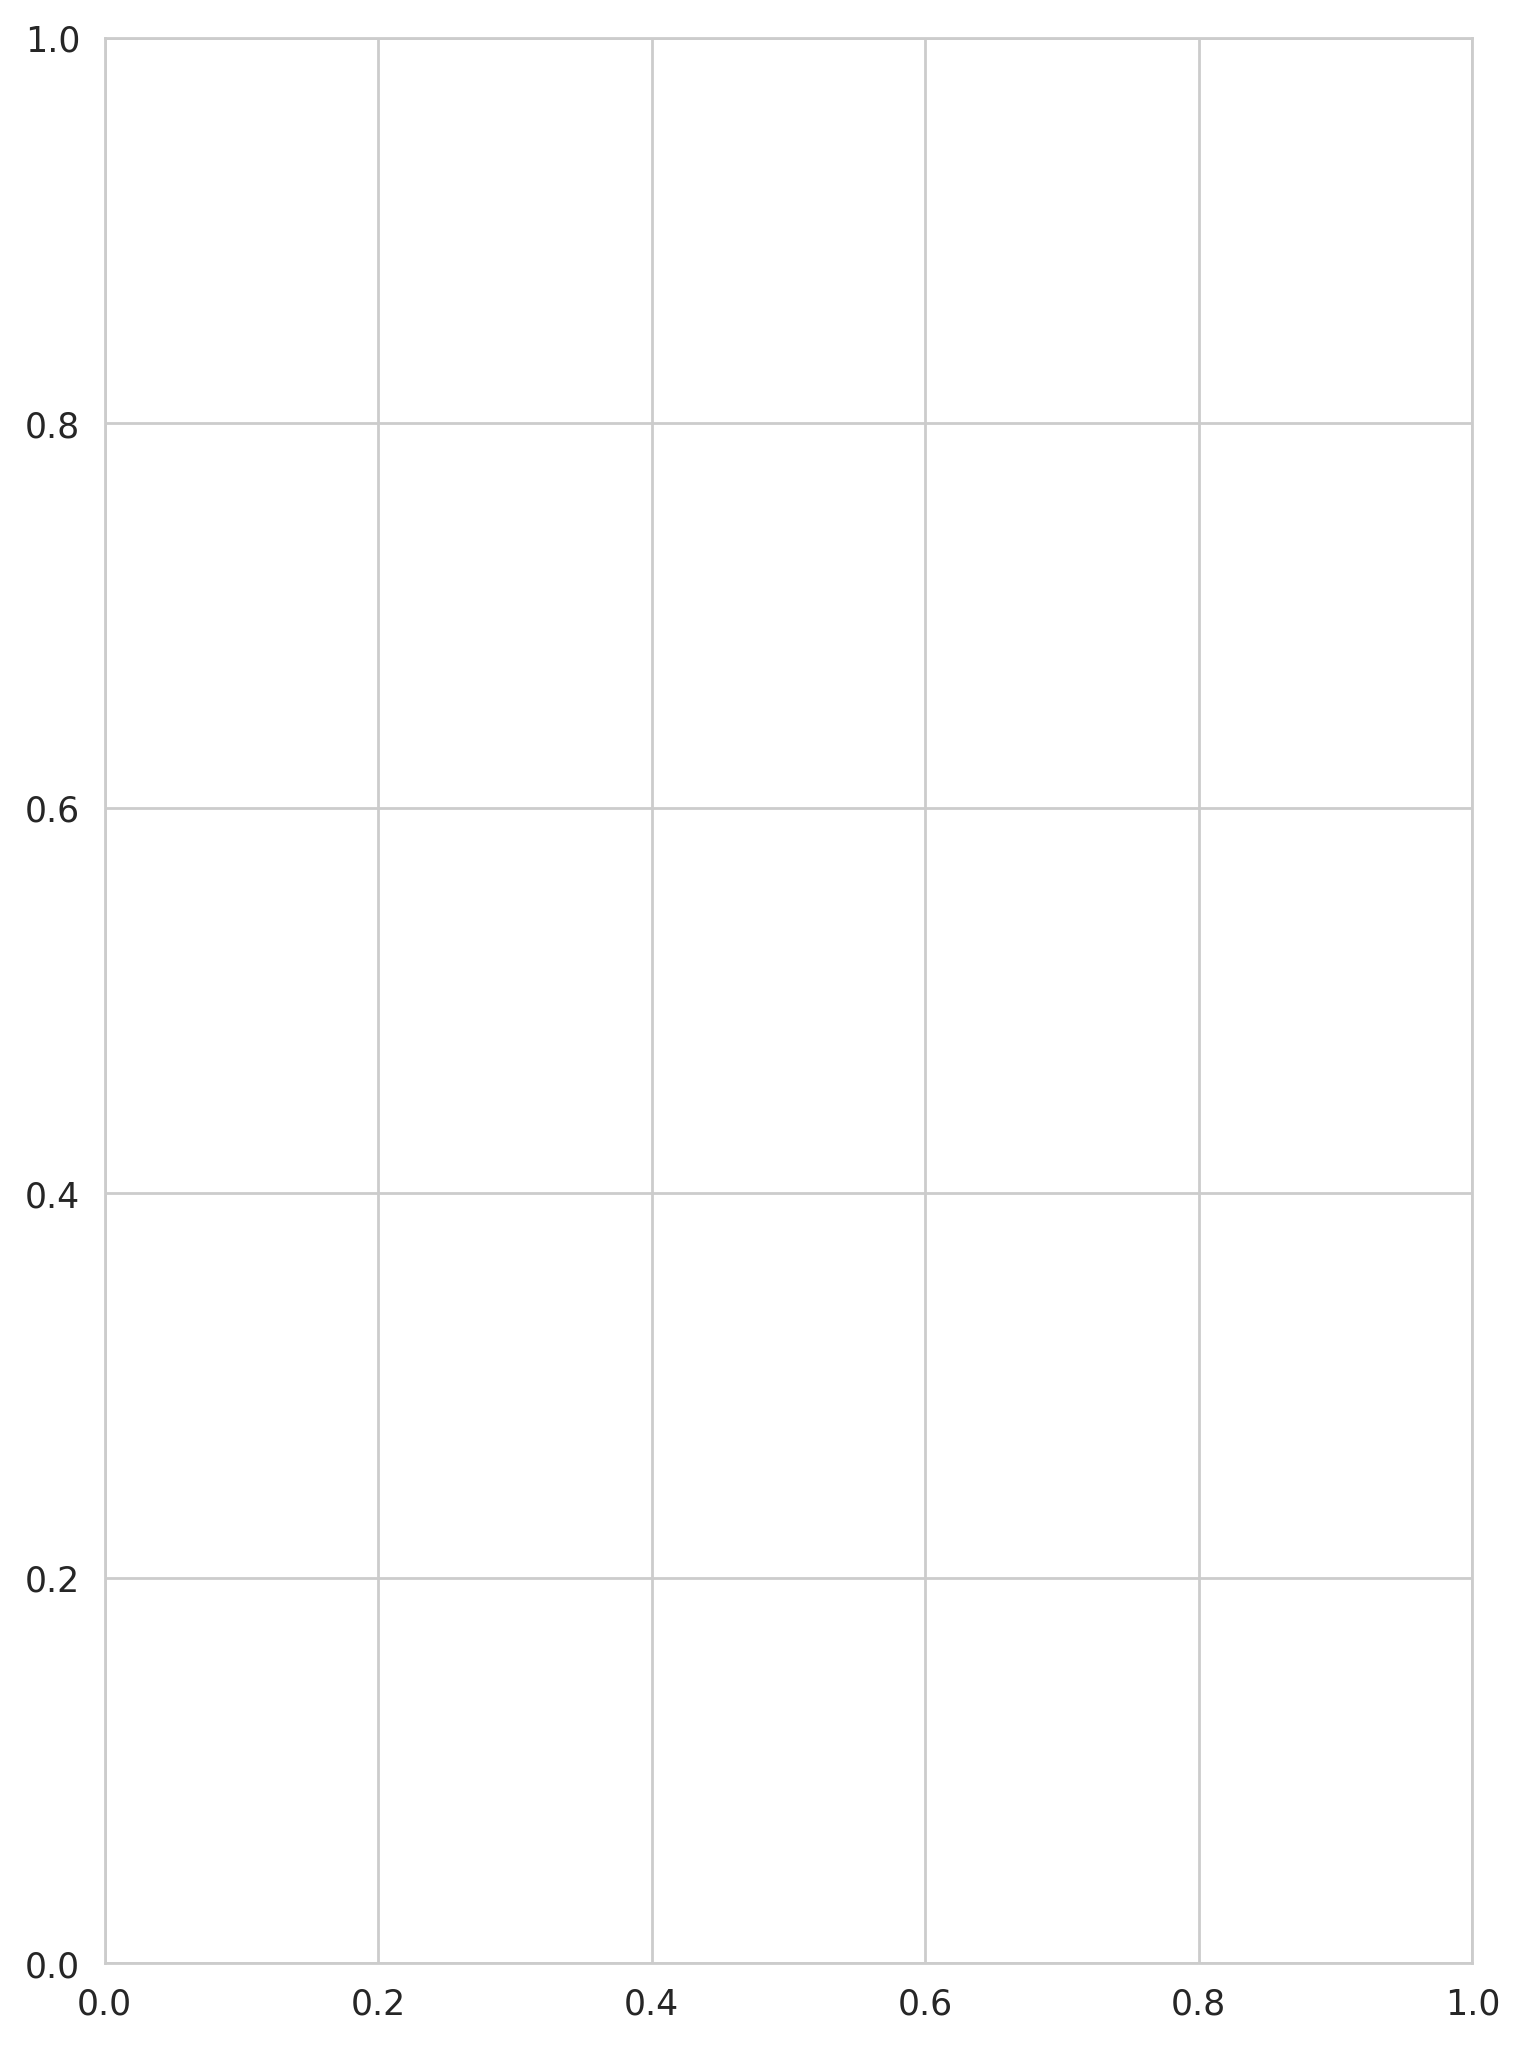

In [ ]:
##Plotting boxplots for 'total_rech_amt' (calling plan recharges)
plot_boxplots_6_7_8('total_rech_amt')

**Observation:**  We can see a drop in the `total recharge amount` for churned customers in the 8th Month (Action Phase).

In [ ]:
##Plotting boxplots for 'total_rech_data_amt' (dataplan recharges).
plot_boxplots_6_7_8('total_rech_data_amt')

**Observation:**  Again, a significant drop in the `total data recharge amount` is seen for churned customers in the 8th Month (Action Phase).

In [ ]:
##Plotting boxplots for 'av_rech_amt_data'
plot_boxplots_6_7_8('av_rech_amt_data')

**Observation:**  Again, a significant drop in the `average data recharge amount` is seen for churned customers in the 8th Month (Action Phase). Also, it makes sense as the total_rech_data_amt_* drops too.

In [ ]:
##Plotting boxplots for 'max_rech_amt'
plot_boxplots_6_7_8('max_rech_amt')

**Observation:** A noticeable drop in the `maximum recharge amount` is seen in the 8th month (action phase) for churned customers.

In [ ]:
##Plotting boxplots for 'last_day_rech_amt'
plot_boxplots_6_7_8('last_day_rech_amt')

**Observation:** We do see a noteworthy drop in the `last day recharge amount` in the 8th month (action phase) for churned customers.

In [ ]:
##Let's check other 'rech_num' and 'max_rech_data' variables
other_rech = telecom_hv.columns[telecom_hv.columns.str.contains('rech_num|max_rech_data',regex=True)]
other_rech

In [ ]:
##Let's check for missing values in 'total_rech_num' and 'max_rech_data' features

other_rech_df = telecom_hv[other_rech]
null_prcnt_df(other_rech_df)

`'total_rech_num'` feature has no missing values whereas `'max_rech_data'` feature still has missing values, around 43-46% for all the 3 months. Let's check the range of values for these features.

In [ ]:
telecom_hv[['max_rech_data_6','max_rech_data_7','max_rech_data_8']].describe()

**Observation:** We see that the minimum value is 1, median is 152 (for all) and also the maximum value is 1555 across all 3 months which indicate that the missing values imply no recharges. Thus, imputing the missing values for such records with 0; meaning no recharges of data plans for the respective missing records.

In [ ]:
##Imputing 'max_rech_data_*' columns with 0 (*columns: all 3 months - month 6, 7 and 8)
telecom_hv[['max_rech_data_6','max_rech_data_7','max_rech_data_8']] = telecom_hv[['max_rech_data_6','max_rech_data_7',\
                                                                                  'max_rech_data_8']].replace(np.nan, 0)

In [ ]:
##Plotting boxplots for 'total_rech_num'
plot_boxplots_6_7_8('total_rech_num')

**Observation:** A noticeable drop in the `total number of recharges` is seen in the 8th month (action phase) for churned customers.

In [ ]:
##Plotting boxplots for 'max_rech_data'
plot_boxplots_6_7_8('max_rech_data')

**Observation:** A significant drop in the `max_rech_data` is seen in the 8th month (action phase) for churned customers.

In [ ]:
##Recheck for missing values in 'recharge' plans for calling and data features
all_rech_vars = list(telecom_hv.columns[telecom_hv.columns.str.contains('rech_amt|rech_data_amt|rech_num|max_rech_data')])  ##Excluding 2g_3g
all_rech = telecom_hv[all_rech_vars]
null_prcnt_df(all_rech)

**(b) Visualizing 2G and 3G based usage attributes**

In [ ]:
usage_2g_3g_vars = list(telecom_hv.columns[telecom_hv.columns.str.contains('2g|3g',regex=True)])
usage_2g_3g_vars

In [ ]:
##Check for missing values
usage_2g_3g = telecom_hv[usage_2g_3g_vars]
null_prcnt_df(usage_2g_3g)

**Observations:** More than 40% missing values exist in `'arpu_2g', 'arpu_3g', 'count_rech_2g' and 'count_rech_3g'` features for all the 3 months. These are revenue based features counting towards 2G and 3G. Moreover, there are more than 46% missing values. Hence, we drop these columns .

In [ ]:
##Dropping 'arpu_2g', 'arpu_3g', 'count_rech_2g' and 'count_rech_3g' based features (revenue_based)
drop_vars = list(telecom_hv.columns[telecom_hv.columns.str.contains('arpu_2g|arpu_3g|count_rech_2g_|count_rech_3g')])
telecom_hv.drop(drop_vars, axis=1, inplace=True)

Now there are no more missing values associated with the 2G and 3G usage-based features

In [ ]:
##Plotting volume of data usage:

##Plotting volume of 2G data usage features:
plot_boxplots_6_7_8('vol_2g_mb')

##Plotting volume of 3G data usage features:
plot_boxplots_6_7_8('vol_3g_mb')

**Observations:**<br>(i) The `volume of 2G and 3G data usage` substantially drops in the 8th month(action phase) for churned customers.<br>(ii) Also, we see the `usage of 3G data` is comparatively `lesser than that of 2G data`, though the drop seems to follow similar pattern.

In [ ]:
##Checking data trend in monthly service schemes for 2g and 3g data: 'monthly_2g' and 'monthly_3g' features. Plotting boxplots.

plot_boxplots_6_7_8('monthly_2g')  #monthly_2g for all 3 months
plot_boxplots_6_7_8('monthly_3g')   #monthly_3g for all 3 months

In [ ]:
##Since the range is very small and no trend can be seen, let's use barplot

##Defining a function for barplots for features belonging to months (6), (7) and (8) respectively with churn and no churn hue.
##(0: Not Churned (Retention), 1: Churned)

def plot_barplots_6_7_8(feature):  ##Note: Showfliers: False (Suppresses the effect of outliers on the graphs.)
    plt.figure(figsize=(24,10), dpi=250)
    sns.set_style("whitegrid")
    df = telecom_hv.copy()

    plt.subplot(1,3,1)
    ax_11= sns.barplot(data=df, y=feature+"_6", x=df["churn"], hue="churn", palette=("Paired"))
    ax_11.set_xticklabels(labels=['Not Churned\n(Retention)','Churned'], fontsize=18)
    plt.title(f"\nBarplot: '{feature}_6'\n", fontsize=22, fontweight='bold')
    plt.ylabel(feature+"_6", fontsize=20, fontstyle='italic')
    plt.xlabel("churn", fontsize=22, fontstyle='italic')
    plt.yticks(fontsize=16)

    #legend subplot_131
    T1= ax_11.legend(loc='center', bbox_to_anchor=(0.5, 0.94), fancybox=True, framealpha=1, shadow=True, borderpad=1)
    T1.get_texts()[0].set_text('Not Churned (Retention)')
    T1.get_texts()[1].set_text('Churned')

    plt.subplot(1,3,2)
    ax_22= sns.barplot(data=df, y=feature+"_7", x=df["churn"], hue="churn", palette=("Paired"))
    ax_22.set_xticklabels(labels=['Not Churned\n(Retention)','Churned'], fontsize=18)
    plt.title(f"\nBarplot: '{feature}_7'\n", fontsize=22, fontweight='bold')
    plt.ylabel(feature+"_7", fontsize=20, fontstyle='italic')
    plt.xlabel("churn", fontsize=20, fontstyle='italic')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    #legend subplot_132
    T2= ax_22.legend(loc='center', bbox_to_anchor=(0.5, 0.94), fancybox=True, framealpha=1, shadow=True, borderpad=1)
    T2.get_texts()[0].set_text('Not Churned (Retention)')
    T2.get_texts()[1].set_text('Churned')

    plt.subplot(1,3,3)
    ax_33= sns.barplot(data=df, y=feature+"_8", x=df["churn"], hue="churn", palette=("Paired"))
    ax_33.set_xticklabels(labels=['Not Churned\n(Retention)','Churned'], fontsize=18)
    plt.title(f"\nBarplot: '{feature}_8'\n", fontsize=22, fontweight='bold')
    plt.ylabel(feature+"_8", fontsize=20, fontstyle='italic')
    plt.xlabel("churn", fontsize=20, fontstyle='italic')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    #legend subplot_133
    T3= ax_33.legend(loc='center', bbox_to_anchor=(0.5, 0.94), fancybox=True, framealpha=1, shadow=True, borderpad=1)
    T3.get_texts()[0].set_text('Not Churned (Retention)')
    T3.get_texts()[1].set_text('Churned')

    plt.show()

In [ ]:
#Barplots for 'monthly_2g' and 'monthly_3g' usage check
plot_barplots_6_7_8('monthly_2g')  #monthly_2g for all 3 months
plot_barplots_6_7_8('monthly_3g')   #monthly_3g for all 3 months

**Observation:** Again we can see a drop in` monthly 2G and 3G subscriptions` for churned customers in 8th Month(action phase)

In [ ]:
##Checking service schemes with validity smaller than a month for 2G/3G (sachet_2g') and ('sachet_3g') features

plot_barplots_6_7_8('sachet_2g')  #sachet_2g (service schemes with validity smaller than a month): for all 3 months
plot_barplots_6_7_8('sachet_3g')   #sachet_3g (service schemes with validity smaller than a month): for all 3 months

**Observations:** We see that the `'sachet_2g'` and `'sachet_3g'` schemes we largely used in the first and second months of good phase i.e. month (6) and (7) and then the trend shows a sudden drop in the usage as we approach the 8th month (action phase) for churned customers.

**Check for Volume Based Cost (vbc)**

In [ ]:
##Volume Based Cost (vbc) based features
vbc_cols_list = list(telecom_hv.columns[telecom_hv.columns.str.contains('vbc')])
vbc_cols_list

In [ ]:
##Rename vbc features to the desired format ending with month number
telecom_hv.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8'}, inplace=True)

In [ ]:
##Recheck rename Volume Based Cost (vbc) based features
vbc_cols_list = list(telecom_hv.columns[telecom_hv.columns.str.contains('vbc')])
vbc_cols_list

In [ ]:
##Plotting boxplots and barplots for vbc based features
plot_boxplots_6_7_8('vbc_3g')
plot_barplots_6_7_8('vbc_3g')

**Observations:**<br>(i) The `volume based cost, vbc for 3G` is much lower for Churned customers than the non-churned customers. <br>(ii) Also, we see `a drop in the vbc` as we approach the 8th month(action phase) for churned customers.

**(d) Average Revenue Per User**

In [ ]:
##Checking columns: average revenue per user
arpu_cols = telecom_hv.columns[telecom_hv.columns.str.contains('arpu_')]

##Plotting 'arpu_' barplots
plot_barplots_6_7_8('arpu')

**Observation:** We see a drop in the `average revenue per user` for churned customers as we approach month 8(action phase) from the good phase (i.e. months 6 and 7)

**(e) Minutes of usage (MOU): for voice calls**

In [ ]:
##Check minutes of usage 'mou' columns
mou_cols = telecom_hv.columns[telecom_hv.columns.str.contains('mou')]
mou_cols

In [ ]:
##Check for missing value percentages in 'mou_cols'

mou_cols_df = telecom_hv[mou_cols]
null_prcnt_df(mou_cols_df)

**Observation:** So for all minutes of usage (mou) attributes, the maximum missing % is 3.9128 , means that the customer has not used the respective minutes at all for that particular call type. For example, for the month (8) we see all the records have same missing value(%) i.e. 3.91% (maximum). Thus we can impute these missing values with 0.

In [ ]:
##Imputing minutes of usage (mou) attributes with 0
telecom_hv[mou_cols] = telecom_hv[mou_cols].replace(np.nan, 0)

In [ ]:
##Reheck for missing value percentages in 'mou_cols'

mou_cols_df = telecom_hv[mou_cols]
null_prcnt_df(mou_cols_df)

`No missing values` in `mou features` (including incoming, outgoing, offnet and onnet features)

**(e.1) Incoming Calls**

In [ ]:
##Check for incoming(ic) mou features (just for 6th month)
ic_mou_features = list(telecom_hv.columns[telecom_hv.columns.str.contains('.*_ic_.*mou_6')])
ic_mou_features

In [ ]:
telecom_hv[ic_mou_features].describe()

In [ ]:
##Let's check the correlation between these variables to see if there is pattern between variables

#Plotting a heatmap to understand the correlation between the independent variables
plt.figure(figsize = (12,10), dpi=120)
corr_matrix_new = telecom_hv[ic_mou_features].corr()
f, ax_corr1 = plt.subplots(figsize=(15, 15), dpi=120)
ax_corr1 = sns.heatmap(corr_matrix_new, cmap= 'RdPu', cbar_kws={"shrink": .5}, vmin= -1, vmax=1, center=0,
            square=True, annot=True, linewidths=0.01, annot_kws={"size":12})
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.autoscale()
plt.show()

From the above correlation matrix, We can see that `total_ic_mou_6`, `std_ic_mou_6` and `loc_ic_mou_6` seems to have strong correlation with other fileds and they needs to be inspected to avoid any multicolinearity issues. Let's cross check to eliminate multicollinearity.

In [ ]:
##Let's check for a record (i.e. index 8: example)

print("'loc_ic_mou_6' = 'loc_ic_t2t_mou_6' + 'loc_ic_t2m_mou_6' + 'loc_ic_t2f_mou_6'")
print(telecom_hv.loc[8,'loc_ic_mou_6'],"==",telecom_hv.loc[8,['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6']].sum())

print("\n'std_ic_mou_6' = 'std_ic_t2t_mou_6' + 'std_ic_t2m_mou_6' + 'std_ic_t2f_mou_6'")
print(telecom_hv.loc[8,'std_ic_mou_6'],"==",telecom_hv.loc[8,['std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6']].sum())

print("\n'total_ic_mou_6' = 'loc_ic_mou_6' + 'std_ic_mou_6' + 'isd_ic_mou_6' + 'spl_ic_mou_6'")
print(telecom_hv.loc[8,'total_ic_mou_6'],"==",telecom_hv.loc[8,['loc_ic_mou_6','std_ic_mou_6','isd_ic_mou_6', 'spl_ic_mou_6']].sum())

**Observation:** `'loc_ic_mou_*'`, `'std_ic_mou_*'` and `'total_ic_mou_*'` seems to be the aggregated features. Thus, retaining only the granular level variables and dropping these to reduce the multicollinearity in features.

In [ ]:
##Dropping 'loc_ic_mou', 'std_ic_mou' and 'total_ic_mou' for all 3 months
drop_ic_mou_features = list(telecom_hv.columns[telecom_hv.columns.str.contains('loc_ic_mou_|std_ic_mou_|total_ic_mou_')])
print('List of features dropped:\n', drop_ic_mou_features)

telecom_hv.drop(drop_ic_mou_features, axis=1, inplace= True)

**(e.1) Outgoing Calls**

In [ ]:
##Check for outgoing(og) mou features (just for 6th month)
og_mou_features = list(telecom_hv.columns[telecom_hv.columns.str.contains('.*_og_.*mou_6')])
og_mou_features

In [ ]:
##Let's check the correlation between these variables to see if there is pattern between variables

#Plotting a heatmap to understand the correlation between the independent variables
plt.figure(figsize = (12,10), dpi=120)
corr_matrix_new = telecom_hv[og_mou_features].corr()
f, ax_corr1 = plt.subplots(figsize=(15, 15), dpi=120)
ax_corr1 = sns.heatmap(corr_matrix_new, cmap= 'RdPu', cbar_kws={"shrink": .5}, vmin= -1, vmax=1, center=0,
            square=True, annot=True, linewidths=0.01, annot_kws={"size":12})
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.autoscale()
plt.show()

From the above correlation matrix, We can see that `total_og_mou_6`, `std_og_mou_6` and `loc_og_mou_6` seems to have strong correlation with other fileds and they needs to be inspected to avoid any multicolinearity issues. Let's cross check to eliminate multicollinearity.

In [ ]:
##Let's check for a record (i.e. index 21: example)

print("'loc_og_mou_6' = 'loc_og_t2t_mou_6' + 'loc_og_t2m_mou_6' + 'loc_og_t2f_mou_6'")
print(telecom_hv.loc[21,'loc_og_mou_6'],"==",telecom_hv.loc[21,['loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6']].sum())

print("\n'std_og_mou_6' = 'std_og_t2t_mou_6' + 'std_og_t2m_mou_6' + 'std_og_t2f_mou_6'")
print(telecom_hv.loc[21,'std_og_mou_6'],"==",telecom_hv.loc[21,['std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6']].sum())

print("\n'total_og_mou_6' = 'loc_og_mou_6' + 'std_og_mou_6' +  'spl_og_mou_6' + 'isd_og_mou_6'")
print(telecom_hv.loc[21,'total_og_mou_6'],"==",telecom_hv.loc[21,['loc_og_mou_6','std_og_mou_6','spl_og_mou_6','isd_og_mou_6']].sum())

**Observation:** `'loc_og_mou_*'`, `'std_og_mou_*'` and `'total_og_mou_*'` seems to be the aggregated features. Thus, retaining only the granular level variables and dropping these to reduce the multogollinearity in features.

In [ ]:
##Dropping 'loc_og_mou', 'std_og_mou' and 'total_og_mou' for all 3 months
drop_og_mou_features = list(telecom_hv.columns[telecom_hv.columns.str.contains('loc_og_mou_|std_og_mou_|total_og_mou_')])
print('List of features dropped:\n', drop_og_mou_features)

telecom_hv.drop(drop_og_mou_features, axis=1, inplace= True)

**(f) Offnet MOU Usage:** *All kind of calls outside the operator T network*

In [ ]:
offnet_usage_cols = list(telecom_hv.columns[telecom_hv.columns.str.contains('offnet.*mou')])
offnet_usage_cols

In [ ]:
# Plotting 'offnet_mou' boxplots and barplots
plot_boxplots_6_7_8('offnet_mou')  #Suppresses outliers
plot_barplots_6_7_8('offnet_mou')

**Observation:** The `offnet_mou` (minutes of usage) decline as we move from good phase (i.e. month 6 and 7) to the action phase(month 8) for churned customers.

**(g) Onnet MOU Usage:** *All kind of calls within the same operator network*

In [ ]:
onnet_usage_cols = list(telecom_hv.columns[telecom_hv.columns.str.contains('onnet.*mou')])
onnet_usage_cols

In [ ]:
# Plotting 'onnet_mou' boxplots and barplots
plot_boxplots_6_7_8('onnet_mou')  #Suppresses outliers
plot_barplots_6_7_8('onnet_mou')

**Observation:** The `onnet_mou` (minutes of usage) decline as we move from good phase (i.e. month 6 and 7) to the action phase(month 8) for churned customers.

**(h) Tenure (Age on network) Analysis**

**The AON variable was used to create tenure buckets.** `[AON: Age on network (in number of days)]`<br>
It is observerd that larger the tenure, lesser was the churn - as customers who are newly acquired by the network churned more often in comparison to the old customers.

In [ ]:
##Creating  a new column tenure_year to store the number of years the customer has been on network T
telecom_hv['tenure_year'] = round(telecom_hv['aon']/365, 1)

print(telecom_hv.tenure_year.value_counts())
print("Min:",telecom_hv.tenure_year.min())
print("Max:",telecom_hv.tenure_year.max())

In [ ]:
##Creating bins
my_bins = [0,1,2,3,5,12]
my_labels_aon= ['0_1_year','1_2_year','2_3_year','3_5_year','5_12_year']
telecom_hv['tenure'] = pd.cut(telecom_hv['tenure_year'], bins= my_bins, labels= my_labels_aon)

##Dropping 'tenure_year' and 'aon' column as we have already created bins in 'tenure' column
telecom_hv.drop(['tenure_year','aon'] , axis=1, inplace= True)

telecom_hv.tenure.value_counts()

In [ ]:
##Visualizing 'age of network' and 'churn'
plt.figure(figsize=(14,8))
tenure_df= telecom_hv[['tenure','churn']]
sns.countplot(x = 'tenure', hue = 'churn',data = tenure_df,palette=("plasma"))
plt.show()

**Observation:** We see that as the `age on network (AON) increases`, the number of `people churned out (i.e. churned class label: 1) are reduced`.

In [ ]:
##Check for missing values in telecom_hv dataframe (show only missing value columns)
missing_val_cols_prcnt = round(100*telecom_hv.isnull().sum()/len(telecom_hv.index),2)
missing = pd.DataFrame(missing_val_cols_prcnt[missing_val_cols_prcnt!=0].sort_values(ascending=False))  #Descending order(% NaN)
missing.reset_index(inplace=True)
missing= missing.rename(columns={'index':'features',0:'Null_Percentage'})
missing

**Observation:** <br>(i) Since we checked at the very beginning that `'fb_user_*''` and `'night_pck_user_*'` attributes had same number of missing values as the dates of recharging data plan. Thus, the number of missing values, imply no recharge done. However, 0 has a meaning here, we just can't impute with 0. Also, a lot of values are missing (46.8%) and these features don't seem to be significant. Hence, dropping the `'fb_user_*''` and `'night_pck_user_*'` attributes<br>(ii) Also, imputing `ig_others` and `og_others` with 0, since they had similar missing values as that of incoming mou features and outgoing mou features, thus indicating absence of mou.

In [ ]:
##Dropping 'fb_user_*' and 'night_pck_user_*' features
cols_to_drop = ['fb_user_6', 'fb_user_7', 'fb_user_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8']
telecom_hv.drop(cols_to_drop, axis=1, inplace= True)

##Imputing 'ic_others' and 'og_others' with 0 (<=3.91% missing values)
cols_to_impute = telecom_hv.columns[telecom_hv.columns.str.contains('ic_others|og_others')]
telecom_hv[cols_to_impute] = telecom_hv[cols_to_impute].replace(np.nan, 0)

In [ ]:
##Checking the entire high-value customer dataframe for null (missing) values
null_prcnt_df(telecom_hv)

**All the missing values have been treated carefully and we have derived meaningful insights from the telecom data provided.**

In [ ]:
##Before combination (checking dataset shape)
telecom_hv.shape

**Combination of attributes: Good Phase [month (6) and (7)]**<br>Now that we are done with EDA, we can combine and average the features of month (6) and month (7) to represent the good phase, and drop the fundamental explanatory variables belonging to month (6) and (7) respectively.

In [ ]:
##Features in telecom_hv corresponding to 'month_6'
attributes_6 = list(telecom_hv.columns[telecom_hv.columns.str.contains("_6")])
print(attributes_6)
print(len(attributes_6))

In [ ]:
##Features in telecom_hv corresponding to 'month_7'
attributes_7 = telecom_hv.columns[telecom_hv.columns.str.contains("_7")]
print(attributes_7)
print(len(attributes_7))

In [ ]:
##Firstly, let's drop 'avg_total_rech_plus_data_amt_6_7'
telecom_hv.drop('avg_total_rech_plus_data_amt_6_7', axis=1, inplace= True)

In [ ]:
##Let's combine and take average of remaining '_6'  and '_7' attributes
feature_names_6 = [i.split('_6')[0] for i in attributes_6 if i.endswith("_6")]
feature_names_7 = [i.split('_7')[0] for i in attributes_7 if i.endswith("_7")]
uncommon_feature_names = [i for i,j in (zip(feature_names_6, feature_names_7)) if i!=j]
uncommon_feature_names

In [ ]:
common_feature_names= [i for i,j in (zip(feature_names_6, feature_names_7)) if i==j]
common_feature_names

In [ ]:
#Since all features of '_6' exist in '_7'. Therefore let's find the new 'avg_6_7' features
##(together representing the good phase)

f6_cols=[]
f7_cols=[]
for feature in common_feature_names:
    f6= feature+'_6'
    f7= feature+'_7'
    avg_67= feature+'_avg_6_7'

    f6_cols.append(f6)  ##Storing all remaining attributes from '_6'
    f7_cols.append(f7)  ##Storing all remaining attributes from '_7'

    telecom_hv[avg_67] = (telecom_hv[f6] + telecom_hv[f7])/2

telecom_hv.head()

In [ ]:
##Dropping the fundamental explanatory variables belonging to '_6'
telecom_hv.drop(f6_cols, axis=1, inplace=True)

In [ ]:
##Dropping the fundamental explanatory variables belonging to '_7'
telecom_hv.drop(f7_cols, axis=1, inplace=True)

In [ ]:
telecom_hv.head()

In [ ]:
telecom_hv.shape

In [ ]:
telecom_hv.describe(percentiles= [0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.999])

**Outlier Treatment:**

In [ ]:
##Continuous features
cont_cols_hv= [i for i in telecom_hv.columns if i not in ['mobile_number', 'churn', 'tenure']]
cont_cols_hv

##Using numpy clip() to cap the values of outliers in between 1 and 99.9 percentiles
import numpy as np
for col in cont_cols_hv:
    percentiles = telecom_hv[col].quantile([0.01,0.999]).values
    telecom_hv[col] = np.clip(telecom_hv[col], percentiles[0], percentiles[1])

We have merged most of the columns associated with month 6 & 7 (i.e. good phase) in order to reduce the number of features and retain the variables that are indicators of phase wise performance. By following this apporach, we have substantially reduced the features from 121 to 81.

**Get dummies for categorical variables:**

In [ ]:
##Checking categorical column 'tenure'
telecom_hv.tenure.head()

In [ ]:
#'tenure' is a categorical variable. Converting it into numeric using get_dummies
###Creating dummies for categorical variable 'tenure'
cat_cols= ['tenure']
d_tenure = pd.get_dummies(telecom_hv['tenure'], prefix='tenure', drop_first = True)
telecom_hv = pd.concat([telecom_hv, d_tenure], axis = 1)

##Dropping the 'tenure' column
telecom_hv.drop(cat_cols, axis=1, inplace=True)

In [ ]:
telecom_hv.head()

In [ ]:
telecom_hv.info()

**All the features are converted into numeric types.**

In [ ]:
##Creating an alternate copy of 'telecom_hv' dataframe
df1= telecom_hv.copy()

# <font color='Green'> Model Building

## <font color='Brown'>(1) Logistic Regression Model without PCA (using RFE)

**Checking the Correlation between independent variables (multicollinearity)**

In [ ]:
##Rewriting original dataframe 'telecom_hv'
telecom_hv = df1.copy()

In [ ]:
##Rechecking and eliminating those predictor variables that have a correlation of (threshold:-0.7 to 0.7) with other predictors.

df_corr = telecom_hv.drop(['churn'],axis =1)
my_corr_matrix = df_corr.corr().abs()
my_corr_matrix

upper_triangle = my_corr_matrix.where(np.triu(np.ones(my_corr_matrix.shape), k=1).astype(np.bool))
cols_to_drop = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.70)]  #Reduces multicollinearity (if any)
cols_to_drop  #columns to drop from df. Independent predictors highly correlated to each other

['std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'total_rech_amt_8',
 'av_rech_amt_data_8',
 'vol_3g_mb_8',
 'sachet_2g_8',
 'monthly_3g_8',
 'total_rech_data_amt_8',
 'onnet_mou_avg_6_7',
 'offnet_mou_avg_6_7',
 'roam_og_mou_avg_6_7',
 'loc_og_t2t_mou_avg_6_7',
 'loc_og_t2m_mou_avg_6_7',
 'loc_og_t2f_mou_avg_6_7',
 'std_og_t2t_mou_avg_6_7',
 'std_og_t2m_mou_avg_6_7',
 'std_og_t2f_mou_avg_6_7',
 'isd_og_mou_avg_6_7',
 'loc_ic_t2t_mou_avg_6_7',
 'loc_ic_t2m_mou_avg_6_7',
 'loc_ic_t2f_mou_avg_6_7',
 'std_ic_t2m_mou_avg_6_7',
 'isd_ic_mou_avg_6_7',
 'total_rech_num_avg_6_7',
 'total_rech_amt_avg_6_7',
 'total_rech_data_avg_6_7',
 'max_rech_data_avg_6_7',
 'av_rech_amt_data_avg_6_7',
 'vol_3g_mb_avg_6_7',
 'sachet_2g_avg_6_7',
 'monthly_3g_avg_6_7',
 'vbc_3g_avg_6_7',
 'total_rech_data_amt_avg_6_7']

In [ ]:
##Dropping the strongly correlated variables 'cols_to_drop' from 'telecom_hv' dataframe
telecom_hv.drop(cols_to_drop, axis=1, inplace= True)

In [ ]:
telecom_hv.shape

(29953, 51)

In [ ]:
##Creating a function to find binary value columns from the 'telecom_hv' dataframe (if any)
def binary_val_cols(df):
    df_1 = df.copy()
    dualsvcol = (df_1.nunique()==2)
    list_dualsvcol = list(dualsvcol[dualsvcol.values==True].index)
    return list_dualsvcol

binary_cols = binary_val_cols(df= telecom_hv)
print(binary_cols)

['churn', 'tenure_1_2_year', 'tenure_2_3_year', 'tenure_3_5_year', 'tenure_5_12_year']


In [ ]:
##Dropping 'mobile_number' attribute from the dataframe as it is won't be useful while modeling as it is an ID.
telecom_hv.drop('mobile_number', axis=1, inplace= True)

In [ ]:
telecom_hv.shape

(29953, 50)

**Train-Test Split:**

In [ ]:
##split into train and test
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(telecom_hv, train_size=0.7, test_size = 0.3, random_state=42)

#### Feature Scaling

In [ ]:
##Dataframe with binary columns
df_binary_train = df_train.loc[:, binary_cols]
df_binary_test = df_test.loc[:, binary_cols]

##Dropping binary dummy variables and we shall concat them later to preserve the scale
df_train = df_train.drop(binary_cols, axis=1)
df_test = df_test.drop(binary_cols, axis=1)

##StandardScaler
from sklearn.preprocessing import StandardScaler
all_cols = df_train.columns
scaler = StandardScaler()

#scaler fit_transform on train data
df_train[all_cols] = scaler.fit_transform(df_train[all_cols])
#concat dummies:Train set
df_train = pd.concat([df_train, df_binary_train], axis=1)

#scaler transform on test data
df_test[all_cols] = scaler.transform(df_test[all_cols])
#concat dummies: Test set
df_test = pd.concat([df_test, df_binary_test], axis=1)

In [ ]:
print(df_train.shape)
print(df_test.shape)

(20967, 50)
(8986, 50)


In [ ]:
##Scaled train-data
df_train.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rech_amt_8,total_rech_data_8,max_rech_data_8,vol_2g_mb_8,monthly_2g_8,sachet_3g_8,vbc_3g_8,arpu_avg_6_7,roam_ic_mou_avg_6_7,loc_og_t2c_mou_avg_6_7,spl_og_mou_avg_6_7,og_others_avg_6_7,std_ic_t2t_mou_avg_6_7,std_ic_t2f_mou_avg_6_7,spl_ic_mou_avg_6_7,ic_others_avg_6_7,max_rech_amt_avg_6_7,last_day_rech_amt_avg_6_7,vol_2g_mb_avg_6_7,monthly_2g_avg_6_7,sachet_3g_avg_6_7,churn,tenure_1_2_year,tenure_2_3_year,tenure_3_5_year,tenure_5_12_year
49069,-0.964812,-0.530047,-0.681501,-0.198916,-0.21154,-0.389796,-0.581484,-0.318366,-0.291535,-0.167149,-0.089522,0.169411,-0.053536,-0.380731,-0.478826,-0.372273,-0.207279,-0.310733,-0.201971,4.678425,-0.177665,-0.150320,0.007579,-0.679081,-0.326243,0.493285,-0.594474,2.147621,-0.378221,-0.202604,-0.416668,-1.209988,-0.243155,1.826699,2.557829,0.087698,-0.272806,-0.173231,0.729213,-0.114110,-0.947044,-0.776549,1.927919,-0.461910,-0.25211,0,1,0,0,0
90375,2.763271,7.552357,-0.400812,-0.198916,-0.21154,-0.283090,-0.599979,-0.324278,-0.291535,-0.167149,-0.089522,-0.124505,-0.053536,-0.330029,-0.535894,-0.372273,-0.225945,-0.316851,-0.201971,-0.252982,-0.177665,-0.159435,6.912063,-0.679081,-0.326243,-0.562242,-0.668558,-0.361404,-0.378221,-0.202604,-0.416668,0.650198,-0.243155,-0.346294,-0.450383,-0.321935,-0.166925,-0.203560,-0.430674,-0.168071,-0.879722,-0.654215,-0.437476,-0.461910,-0.25211,0,0,1,0,0
80131,-0.066603,-0.530907,-0.442601,-0.198916,-0.21154,-0.391731,-0.138607,-0.339057,-0.291535,-0.167149,-0.089522,-0.372752,-0.053536,-0.426592,2.975481,-0.372273,-0.245880,-0.317428,-0.201971,-0.252982,-0.177665,-0.150320,0.007579,-0.095786,-0.721958,0.493285,0.238970,-0.360157,-0.378221,-0.202604,-0.361497,-0.263967,-0.243155,-0.346294,-0.199066,-0.321935,-0.272806,-0.215193,-0.430674,-0.063795,-0.287290,-0.219251,-0.437476,-0.461910,-0.25211,0,1,0,0,0
36950,-1.208095,-0.530907,-0.725466,-0.198916,-0.21154,-0.391731,-0.666810,-0.339057,-0.291535,-0.167149,-0.089522,-0.372752,-0.053536,-0.426592,-0.707681,-0.372273,-0.245880,-0.317428,-0.201971,-0.252982,-0.177665,-0.159435,-1.106047,-0.989344,-0.721958,-0.562242,-0.668558,-0.361404,-0.378221,-0.202604,-0.416668,-0.548929,-0.243155,-0.346294,-0.457616,2.378606,-0.264804,-0.097201,-0.430674,1.606814,-0.482523,-0.414079,0.285049,0.838072,-0.25211,1,0,0,0,1
22699,0.562930,-0.470947,3.121238,-0.198916,-0.21154,-0.256922,7.095243,-0.265162,-0.259171,-0.167149,-0.089522,-0.225794,-0.053536,-0.253111,0.209497,-0.215906,-0.245880,-0.291109,-0.201971,-0.252982,-0.177665,-0.151839,-0.103783,-0.095786,0.306902,-0.562242,-0.668558,-0.361404,-0.378221,-0.202604,-0.416668,0.213461,-0.243155,-0.346294,-0.457616,-0.321935,-0.272806,-0.215193,0.397817,-0.160050,-0.347880,-0.332523,-0.437476,-0.461910,-0.25211,0,0,0,1,0


In [ ]:
##Storing target variable to y_train and y_test respectively
y_train = df_train['churn']
y_test = df_test['churn']

##Storing all feature variables to X_train and X_test
X_train = df_train.drop('churn',axis=1)
X_test = df_test.drop('churn',axis=1)

In [ ]:
##Dealing with class imbalance using SMOTE
y= telecom_hv['churn']
print("Before OverSampling, counts of label '1'(train_set): {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0'(train_set): {} \n".format(sum(y_train==0)))
print("Before OverSampling, churn event rate (Entire Dataset): {}% \n".format(round(sum(y==1)/len(y)*100,3)))
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

Before OverSampling, counts of label '1'(train_set): 1695
Before OverSampling, counts of label '0'(train_set): 19272 

Before OverSampling, churn event rate (Entire Dataset): 8.123% 



**We have almost `8.123%` churn rate. There is class-imbalance in the dataset. Let's check for it.**

In [ ]:
##Before Implementing SMOTETomek on the train data, let's build the logistic regression model and check for stats (on unbalanced class dataset)
# logistic regression object
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# train the model on train set
lr.fit(X_train, y_train.ravel())

predictions = lr.predict(X_test)

# print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['Not Churned','Churned']))

              precision    recall  f1-score   support

 Not Churned       0.94      0.99      0.96      8248
     Churned       0.72      0.26      0.39       738

    accuracy                           0.93      8986
   macro avg       0.83      0.63      0.67      8986
weighted avg       0.92      0.93      0.92      8986



**Observations:**<br>(i) The `accuracy` is around 93% but it `doesn't serve as a good evaluation metric` as the `classes are imbalanced` in the dataset.<br>
(ii) The `recall of Churned i.e. positive label (Sensitivity)` is 0.26 is `low` and the `recall of Not Churned i.e. negative label (Specificity)` is `high`, almost 1 (0.99).<br>
(iii) This is not desired since we need to reduce the False Negatives. `For better prediction of Churned (Postive Labels)`, the `sensitivity has to be high`.

In [ ]:
##Implementing 'SMOTETomek' (SMOTE and Tomek links hybrid technique) to deal with the class imbalance

from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_res, y_res = smote_tomek.fit_sample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res==0)))
print("After OverSampling, churn event rate : {}% \n".format(round(sum(y_res==1)/len(y_res)*100,2)))
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

After OverSampling, the shape of train_X: (38510, 49)
After OverSampling, the shape of train_y: (38510,) 

After OverSampling, counts of label '1': 19255
After OverSampling, counts of label '0': 19255
After OverSampling, churn event rate : 50.0% 



##### Now the class in train set seems to be balanced.

**Model Building:** Running Your First Training Model

In [ ]:
import statsmodels.api as sm

In [ ]:
# Logistic regression model
logm1 = sm.GLM(y_res,(sm.add_constant(X_res)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38510
Model:                            GLM   Df Residuals:                    38460
Model Family:                Binomial   Df Model:                           49
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13538.
Date:                Mon, 31 Aug 2020   Deviance:                       27076.
Time:                        19:31:16   Pearson chi2:                 1.47e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.6462      0.035    -18.568      0.000      -0.714      -0.578
arpu_8                       -0.0687      0.052     -1.320      0.187      -0.171       0.033
onnet_mou_8                  -0.2881      0.028    -10.332      0.000      -0.343      -0.233
offnet_mou_8                 -0.3593      0.032    -11.371      0.000      -0.421      -0.297
roam_ic_mou_8                 0.0164      0.020      0.801      0.423      -0.024       0.057
roam_og_mou_8                 0.0875      0.020      4.309      0.000       0.048       0.127
loc_og_t2t_mou_8             -0.1225      0.036     -3.393      0.001      -0.193      -0.052
loc_og_t2m_mou_8             -0.3996      0.047     -8.498      0.000      -0.492      -0.307
loc_og_t2f_mou_8             -0.1493      0.036     -4.103      0.000      -0.221      -0.078
loc_og_t2c_mou_8              0.0974      0.026      3.753      0.000       0.047       0.148
std_og_t2f_mou_8             -0.0328      0.024     -1.366      0.172      -0.080       0.014
isd_og_mou_8                 -0.1834      0.028     -6.583      0.000      -0.238      -0.129
spl_og_mou_8                 -0.1865      0.037     -4.995      0.000      -0.260      -0.113
og_others_8                  -0.2498      0.106     -2.363      0.018      -0.457      -0.043
loc_ic_t2t_mou_8             -0.4040      0.051     -7.917      0.000      -0.504      -0.304
loc_ic_t2m_mou_8             -0.9112      0.056    -16.150      0.000      -1.022      -0.801
loc_ic_t2f_mou_8             -0.3433      0.049     -6.969      0.000      -0.440      -0.247
std_ic_t2t_mou_8             -0.4854      0.050     -9.714      0.000      -0.583      -0.387
std_ic_t2m_mou_8             -0.1070      0.025     -4.233      0.000      -0.157      -0.057
std_ic_t2f_mou_8             -0.0715      0.030     -2.401      0.016      -0.130      -0.013
spl_ic_mou_8                 -0.6459      0.037    -17.353      0.000      -0.719      -0.573
isd_ic_mou_8                 -0.0137      0.026     -0.534      0.593      -0.064       0.037
ic_others_8                   0.0629      0.024      2.641      0.008       0.016       0.110
total_rech_num_8             -0.6470      0.032    -20.499      0.000      -0.709      -0.585
max_rech_amt_8                0.0216      0.029      0.733      0.464      -0.036       0.079
last_day_rech_amt_8          -0.5419      0.028    -19.690      0.000      -0.596      -0.488
total_rech_data_8            -0.6785      0.037    -18.212      0.000      -0.751      -0.605
max_rech_data_8              -0.3616      0.027    -13.389      0.000      -0.415      -0.309
vol_2g_mb_8                  -0.3890      0.039     -9.977      0.000      -0.465      -0.313
monthly_2g_8                 -0.0281      0.031     -0.922      0.356      

**Feature Selection Using RFE**

In [ ]:
logreg = LogisticRegression()   ##Class imbalance dealt using SMOTE
logreg
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

LogisticRegression()

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 25)             # running RFE with 25 variables as output
rfe = rfe.fit(X_res, y_res)

In [ ]:
list(zip(X_res.columns, rfe.support_, rfe.ranking_))

[('arpu_8', False, 9),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_8', False, 22),
 ('roam_og_mou_8', False, 8),
 ('loc_og_t2t_mou_8', False, 5),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_8', True, 1),
 ('loc_og_t2c_mou_8', False, 10),
 ('std_og_t2f_mou_8', False, 18),
 ('isd_og_mou_8', True, 1),
 ('spl_og_mou_8', True, 1),
 ('og_others_8', True, 1),
 ('loc_ic_t2t_mou_8', True, 1),
 ('loc_ic_t2m_mou_8', True, 1),
 ('loc_ic_t2f_mou_8', True, 1),
 ('std_ic_t2t_mou_8', True, 1),
 ('std_ic_t2m_mou_8', False, 7),
 ('std_ic_t2f_mou_8', False, 12),
 ('spl_ic_mou_8', True, 1),
 ('isd_ic_mou_8', False, 23),
 ('ic_others_8', False, 13),
 ('total_rech_num_8', True, 1),
 ('max_rech_amt_8', False, 21),
 ('last_day_rech_amt_8', True, 1),
 ('total_rech_data_8', True, 1),
 ('max_rech_data_8', True, 1),
 ('vol_2g_mb_8', True, 1),
 ('monthly_2g_8', False, 20),
 ('sachet_3g_8', False, 2),
 ('vbc_3g_8', True, 1),
 ('arpu_avg_6_7', True, 1),
 ('roam_ic_mou_avg_6_7', False,

In [ ]:
##Columns supported by 'rfe.support_'
col_rfe_sup = X_res.columns[rfe.support_]
col_rfe_sup

Index(['onnet_mou_8', 'offnet_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8',
       'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rech_amt_8',
       'total_rech_data_8', 'max_rech_data_8', 'vol_2g_mb_8', 'vbc_3g_8',
       'arpu_avg_6_7', 'std_ic_t2t_mou_avg_6_7', 'monthly_2g_avg_6_7',
       'tenure_1_2_year', 'tenure_2_3_year', 'tenure_3_5_year',
       'tenure_5_12_year'],
      dtype='object')

In [ ]:
##Creating X_res_rfe dataframe with RFE selected variables
X_res_rfe = X_res[col_rfe_sup]

**Assessing the model with StatsModels**

In [ ]:
##Defining a function for VIFs (variation inflation factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor

def mod_vif(X_res_set):
    telecom_hv = pd.DataFrame()
    X = X_res_set
    telecom_hv['Features'] = X.columns
    telecom_hv['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    telecom_hv['VIF'] = round(telecom_hv['VIF'], 2)
    telecom_hv = telecom_hv.sort_values(by = "VIF", ascending = False)
    telecom_hv = telecom_hv[~(telecom_hv.Features=='const')] #Ignore the constant from the display
    return telecom_hv

**Model 1:**

In [ ]:
##Building Model 1:
X_res_rfe = sm.add_constant(X_res_rfe)
logm3 = sm.GLM(y_res,X_res_rfe, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

##Checking VIFs of independent variables
mod_vif(X_res_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38510
Model:                            GLM   Df Residuals:                    38484
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13715.
Date:                Mon, 31 Aug 2020   Deviance:                       27430.
Time:                        19:31:22   Pearson chi2:                 1.95e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

,Features,VIF
3,loc_og_t2m_mou_8,2.17
13,total_rech_num_8,1.93
2,offnet_mou_8,1.86
9,loc_ic_t2m_mou_8,1.85
16,max_rech_data_8,1.66
11,std_ic_t2t_mou_8,1.60
20,std_ic_t2t_mou_avg_6_7,1.56
15,total_rech_data_8,1.50
18,vbc_3g_8,1.44
25,tenure_5_12_year,1.39


**Observations:**<br>From the statistics summary, we conclude that the `model is stable` as the highest VIF of features is 2.17 (<threshold: 5) and p-value(<0.05). Thus, making all the variables as significant ones.<br>

In [ ]:
##Getting the predicted values on the train set
y_res_pred = res.predict(X_res_rfe)
y_res_pred[:10]

0    0.007762
1    0.002630
2    0.027293
3    0.657704
4    0.003170
5    0.715743
6    0.000320
7    0.297764
8    0.375563
9    0.165289
dtype: float64

In [ ]:
y_res_pred = y_res_pred.values.reshape(-1)
y_res_pred[:10]

array([7.76219620e-03, 2.62999996e-03, 2.72933625e-02, 6.57704494e-01,
       3.17014469e-03, 7.15743460e-01, 3.20128250e-04, 2.97764210e-01,
       3.75562682e-01, 1.65288786e-01])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [ ]:
y_res_pred_final = pd.DataFrame({'Churn':y_res.values, 'Churn_Prob':y_res_pred})
y_res_pred_final['CustID'] = y_res.index    ##CustID is the record index ID
y_res_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.007762,0
1,0,0.002630,1
2,0,0.027293,2
3,1,0.657704,3
4,0,0.003170,4


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [ ]:
y_res_pred_final['predicted'] = y_res_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_res_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.007762,0,0
1,0,0.002630,1,0
2,0,0.027293,2,0
3,1,0.657704,3,1
4,0,0.003170,4,0


Logistic Regression (without) PCA) Model Stats Scores Summary : 


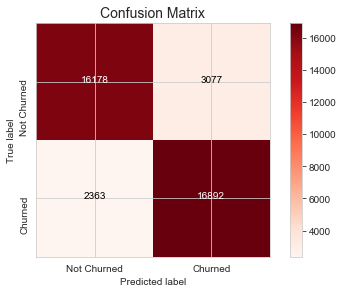

In [ ]:
##Confusion matrix
from sklearn import metrics
confusion = metrics.confusion_matrix(y_res_pred_final.Churn, y_res_pred_final.predicted)
print_model_metrics(y_res_pred_final.Churn, y_res_pred_final.predicted,'Logistic Regression (without) PCA)')

In [ ]:
# Let's check the overall accuracy. (train_data)---Balanced classes
print(metrics.accuracy_score(y_res_pred_final.Churn, y_res_pred_final.predicted))

0.8587379901324331


###  Plotting the ROC Curve

In [ ]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='(ROC-AUC = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_res_pred_final.Churn, y_res_pred_final.Churn_Prob, drop_intermediate = False )

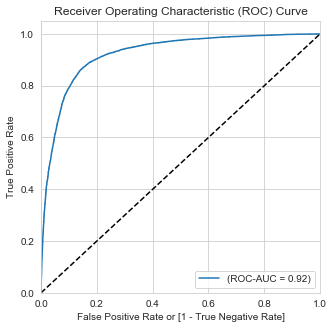

In [ ]:
##ROC curve for train data
draw_roc(y_res_pred_final.Churn, y_res_pred_final.Churn_Prob)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [ ]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_res_pred_final[i]= y_res_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_res_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.007762,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0.002630,1,0,1,0,0,0,0,0,0,0,0,0
2,0,0.027293,2,0,1,0,0,0,0,0,0,0,0,0
3,1,0.657704,3,1,1,1,1,1,1,1,1,0,0,0
4,0,0.003170,4,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
##Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_res_pred_final.Churn, y_res_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0  0.0   0.500000  1.000000  0.000000
0.1  0.1   0.732355  0.977408  0.487302
0.2  0.2   0.794131  0.958245  0.630018
0.3  0.3   0.828408  0.935186  0.721631
0.4  0.4   0.849078  0.910361  0.787795
0.5  0.5   0.858738  0.877279  0.840197
0.6  0.6   0.854142  0.827733  0.880551
0.7  0.7   0.836822  0.757050  0.916593
0.8  0.8   0.783147  0.617606  0.948689
0.9  0.9   0.692677  0.403791  0.981563


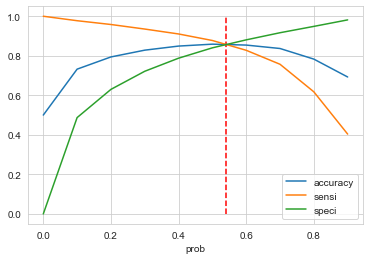

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
%matplotlib inline
sns.set_style('whitegrid')
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.54, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

#### From the curve above, 0.54 is the optimum point to take it as a cutoff probability.

In [ ]:
y_res_pred_final['final_predicted'] = y_res_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.54 else 0)
y_res_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.007762,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.002630,1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.027293,2,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.657704,3,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.003170,4,0,1,0,0,0,0,0,0,0,0,0,0


Logistic Regression (without) PCA) Model Stats Scores Summary : 


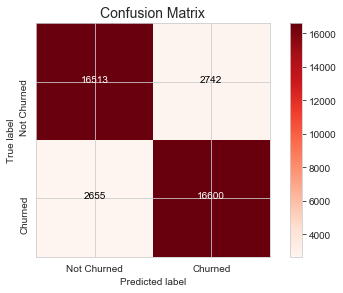

In [ ]:
##Confusion Matrix (optimal train set)
confusion_train_opt = metrics.confusion_matrix(y_res_pred_final.Churn, y_res_pred_final.final_predicted)
print_model_metrics(y_res_pred_final.Churn, y_res_pred_final.final_predicted,'Logistic Regression (without) PCA)')

In [ ]:
##Let's evaluate Evaluation Metrics (train_data)
printbold('**Evaluation Metrics: Train Set (Optimal Cut-off)**')
print("******************************************************************")
print('Accuracy of Train Set: (Logistic Regression Model without PCA):')
print(metrics.accuracy_score(y_res_pred_final.Churn, y_res_pred_final.final_predicted))
print("******************************************************************")

print(classification_report(y_res_pred_final.Churn, y_res_pred_final.final_predicted, target_names=['Not Churned','Churned']))
print("******************************************************************")

print(other_metrics_logistic_model(confusion_train_opt))
print("******************************************************************")
print('ROC of Train Set: (Logistic Regression Model without PCA):')
print("{:2.3}".format(metrics.roc_auc_score(y_res_pred_final.Churn, y_res_pred_final.Churn_Prob)))


**Evaluation Metrics: Train Set (Optimal Cut-off)**

******************************************************************
Accuracy of Train Set: (Logistic Regression Model without PCA):
0.8598545832251363
******************************************************************
              precision    recall  f1-score   support

 Not Churned       0.86      0.86      0.86     19255
     Churned       0.86      0.86      0.86     19255

    accuracy                           0.86     38510
   macro avg       0.86      0.86      0.86     38510
weighted avg       0.86      0.86      0.86     38510

******************************************************************
                            Value
Evaluation Metrics               
Sensitivity                0.8621
Specificity                0.8576
False Positive Rate        0.1424
Positive Predictive Value  0.8582
Negative Predictive Value  0.8615
Misclassification Rate     0.1401
******************************************************************
ROC of Train Set: (Logistic Regression Model witho

**Observation:**<br>After finding optimal cut-off, <br>(i) `ROC_AUC` of the train set: `0.923` <br>(ii) Recall Score of the train set: `0.86`

### Precision and Recall Trade-off

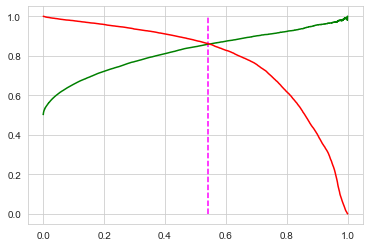

In [ ]:
from sklearn.metrics import precision_recall_curve
sns.set_style('whitegrid')

p, r, thresholds = precision_recall_curve(y_res_pred_final.Churn, y_res_pred_final.Churn_Prob)

plt.plot(thresholds, p[:-1], "g-")    ##Precision: Green-Line
plt.plot(thresholds, r[:-1], "r-")   ##Recall: Red-Line
plt.vlines(x=0.54, ymax=1, ymin=0, colors='magenta', linestyles="--")
plt.show()

### **Prediction and Evaluation: Test Set**

In [ ]:
##Making predictions on test data

X_res_new1 = X_res_rfe
X_res_new1.drop('const', axis=1, inplace=True)

#Assigning similar columns to test data as that of train set
X_test = X_test[X_res_new1.columns]
X_test.head()

,onnet_mou_8,offnet_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,spl_ic_mou_8,total_rech_num_8,last_day_rech_amt_8,total_rech_data_8,max_rech_data_8,vol_2g_mb_8,vbc_3g_8,arpu_avg_6_7,std_ic_t2t_mou_avg_6_7,monthly_2g_avg_6_7,tenure_1_2_year,tenure_2_3_year,tenure_3_5_year,tenure_5_12_year
73764,-0.225830,-0.250297,-0.559060,-0.339057,-0.089522,-0.221696,-0.053536,0.106787,-0.522713,-0.275614,0.962522,-0.252982,-0.771959,1.256619,-0.562242,-0.668558,-0.361404,0.201901,0.027136,4.388770,-0.46191,0,0,1,0
18280,-0.179162,3.347565,7.446657,-0.035202,-0.089522,-0.372752,-0.053536,0.862481,1.277520,-0.052845,-0.245880,-0.252982,0.564392,1.272447,0.141442,1.665086,0.355342,1.786960,1.728187,-0.081047,-0.46191,0,0,0,0
43793,-0.528235,-0.699078,-0.666810,-0.339057,-0.089522,-0.372752,-0.053536,-0.426592,-0.707681,-0.372273,-0.245880,-0.252982,-0.215146,-0.349986,0.493285,-0.437046,0.672726,-0.416668,-0.895796,-0.195302,-0.46191,0,0,1,0
69530,-0.530907,-0.723116,-0.662043,-0.339057,-0.089522,-0.372752,-0.053536,-0.380385,-0.487564,-0.156465,-0.245880,-0.252982,0.007579,-0.587415,1.196969,-0.437046,1.227802,-0.416668,-1.046963,-0.260711,-0.46191,0,0,0,0
71555,-0.149068,-0.128780,0.357989,-0.333145,-0.089522,-0.111624,-0.053536,1.100983,-0.032978,-0.331842,-0.245880,-0.252982,0.564392,-0.326243,0.493285,0.238970,0.580087,1.046187,0.087334,-0.236241,-0.46191,0,1,0,0


In [ ]:
##Adding the constant to X_test (as res model is based on statsmodels)
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)

In [ ]:
##Getting the predicted values on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

73764    0.393024
18280    0.000491
43793    0.281967
69530    0.552635
71555    0.036263
62740    0.364840
27580    0.238110
67019    0.111834
22171    0.025446
75445    0.021124
dtype: float64

In [ ]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([3.93023582e-01, 4.91440018e-04, 2.81966809e-01, 5.52634988e-01,
       3.62628672e-02, 3.64840192e-01, 2.38109505e-01, 1.11834305e-01,
       2.54461696e-02, 2.11242908e-02])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [ ]:
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['CustID'] = y_test.index    ##CustID is the record index ID
y_test_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.393024,73764
1,0,0.000491,18280
2,0,0.281967,43793
3,0,0.552635,69530
4,0,0.036263,71555


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.54 (optimal cut-off) else 0

In [ ]:
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.54 else 0)  ##optimal cut-off is 0.54
y_test_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.393024,73764,0
1,0,0.000491,18280,0
2,0,0.281967,43793,0
3,0,0.552635,69530,1
4,0,0.036263,71555,0


Logistic Regression (without) PCA) Model Stats Scores Summary : 


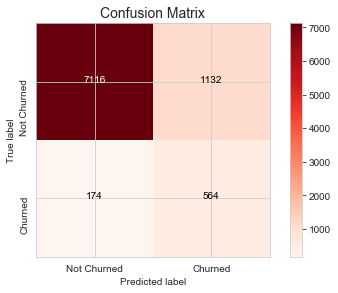

In [ ]:
##Confusion Matrix (optimal test set)
confusion_test_opt = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted)
print_model_metrics(y_test_pred_final.Churn, y_test_pred_final.predicted,'Logistic Regression (without) PCA)')

In [ ]:
##Let's evaluate Evaluation Metrics (test_data)
printbold('**Evaluation Metrics: Test Set (Optimal Cut-off)**')
print("******************************************************************")
print("Accuracy of Test Set: (Logistic Regression Model without PCA):")
print(metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted))
print("******************************************************************")

from sklearn.metrics import classification_report
print(classification_report(y_test_pred_final.Churn, y_test_pred_final.predicted, target_names=['Not Churned','Churned']))  # target_names=target_names
print("******************************************************************")

print(other_metrics_logistic_model(confusion_test_opt))
print("******************************************************************")
print('ROC of Test Set: (Logistic Regression Model without PCA):')
print("{:2.3}".format(metrics.roc_auc_score(y_test_pred_final.Churn, y_test_pred_final.Churn_Prob)))

**Evaluation Metrics: Test Set (Optimal Cut-off)**

******************************************************************
Accuracy of Test Set: (Logistic Regression Model without PCA):
0.8546628088137103
******************************************************************
              precision    recall  f1-score   support

 Not Churned       0.98      0.86      0.92      8248
     Churned       0.33      0.76      0.46       738

    accuracy                           0.85      8986
   macro avg       0.65      0.81      0.69      8986
weighted avg       0.92      0.85      0.88      8986

******************************************************************
                            Value
Evaluation Metrics               
Sensitivity                0.7642
Specificity                0.8628
False Positive Rate        0.1372
Positive Predictive Value  0.3325
Negative Predictive Value  0.9761
Misclassification Rate     0.1453
******************************************************************
ROC of Test Set: (Logistic Regression Model without

**Observation:**<br>Using the optimal cut-off,<br>(i) `ROC_AUC` of test set: `0.885`<br>(ii) `Recall Score` of test set: `0.76`.

### Top 10  Features Based on Feature Importance:

In [ ]:
##Creating a dataframe of features and coefficients

##Coefficients of features
rfe_coef_list = np.array(rfe.estimator_.coef_.round(4).tolist()[0])

rfe_df = pd.DataFrame({'Features':X_res_rfe.columns, 'Coefficients':rfe_coef_list, \
                         'Abs_Coefficients (Desc_Sort)':abs(rfe_coef_list)})

##Sorting coefficient in descending order of absolute coefficient values and reset index to 'Features'
rfe_df = rfe_df.sort_values(by='Abs_Coefficients (Desc_Sort)', ascending=False)
rfe_df["Rank (Feature Importance Based)"] = rfe_df["Abs_Coefficients (Desc_Sort)"].rank(ascending=False)
rfe_df.drop('Abs_Coefficients (Desc_Sort)', axis=1, inplace=True)
rfe_df.set_index('Features', inplace= True)
rfe_df

,Coefficients,Rank (Feature Importance Based)
Features,,
tenure_3_5_year,-2.1444,1.0
tenure_5_12_year,-2.1433,2.0
tenure_2_3_year,-1.7109,3.0
tenure_1_2_year,-1.4500,4.0
loc_ic_t2m_mou_8,-0.9594,5.0
arpu_avg_6_7,0.7388,6.0
spl_ic_mou_8,-0.6885,7.0
total_rech_num_8,-0.6430,8.0
total_rech_data_8,-0.5451,9.0


In [ ]:
##Top 15 features (feature importance based ranking)

##Getting Top15 features
top15_df= rfe_df[:15]
top15_df

printbold("**Top 15 features in the model based on their importance are as follows:**")
print('*'*70)
print(top15_df)

**Top 15 features in the model based on their importance are as follows:**

**********************************************************************
                     Coefficients  Rank (Feature Importance Based)
Features                                                          
tenure_3_5_year     -2.1444        1.0                            
tenure_5_12_year    -2.1433        2.0                            
tenure_2_3_year     -1.7109        3.0                            
tenure_1_2_year     -1.4500        4.0                            
loc_ic_t2m_mou_8    -0.9594        5.0                            
arpu_avg_6_7         0.7388        6.0                            
spl_ic_mou_8        -0.6885        7.0                            
total_rech_num_8    -0.6430        8.0                            
total_rech_data_8   -0.5451        9.0                            
last_day_rech_amt_8 -0.5367        10.0                           
std_ic_t2t_mou_8    -0.5199        11.0                           
loc_ic_t2t_mou_8    -0.4949        12.0                   

**Note: Feature Analysis and business recommendations are made carefully at the end of the code.**

## <font color='Brown'> (1.1) Logistic Regression Model (with PCA)

In [ ]:
##Rewriting original dataframe 'telecom_hv'
telecom_hv = df1.copy()

In [ ]:
telecom_hv.shape

(29953, 84)

In [ ]:
##Creating a function to find binary value columns from the 'telecom_hv' dataframe (if any)
def binary_val_cols(df):
    df_1 = df.copy()
    dualsvcol = (df_1.nunique()==2)
    list_dualsvcol = list(dualsvcol[dualsvcol.values==True].index)
    return list_dualsvcol

binary_cols = binary_val_cols(df= telecom_hv)
print(binary_cols)

['churn', 'tenure_1_2_year', 'tenure_2_3_year', 'tenure_3_5_year', 'tenure_5_12_year']


In [ ]:
##Dropping 'mobile_number' attribute from the dataframe as it is won't be useful while modeling as it is an ID.
telecom_hv.drop('mobile_number', axis=1, inplace= True)

#### Train Test Split:

In [ ]:
##Split into train and test
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(telecom_hv, train_size=0.7, test_size = 0.3, random_state=42)

#### **Feature Scaling:**

In [ ]:
##Dataframe with binary columns
df_binary_train = df_train.loc[:, binary_cols]
df_binary_test = df_test.loc[:, binary_cols]

##Dropping binary dummy variables and we shall concat them later to preserve the scale
df_train = df_train.drop(binary_cols, axis=1)
df_test = df_test.drop(binary_cols, axis=1)

##StandardScaler
from sklearn.preprocessing import StandardScaler
all_cols = df_train.columns
scaler = StandardScaler()

#scaler fit_transform on train data
df_train[all_cols] = scaler.fit_transform(df_train[all_cols])
#concat dummies:Train set
df_train = pd.concat([df_train, df_binary_train], axis=1)

#scaler transform on test data
df_test[all_cols] = scaler.transform(df_test[all_cols])
#concat dummies: Test set
df_test = pd.concat([df_test, df_binary_test], axis=1)

In [ ]:
print(df_train.shape)
print(df_test.shape)

(20967, 83)
(8986, 83)


In [ ]:
##Scaled train-data
df_train.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rech_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,vbc_3g_8,total_rech_data_amt_8,arpu_avg_6_7,onnet_mou_avg_6_7,offnet_mou_avg_6_7,roam_ic_mou_avg_6_7,roam_og_mou_avg_6_7,loc_og_t2t_mou_avg_6_7,loc_og_t2m_mou_avg_6_7,loc_og_t2f_mou_avg_6_7,loc_og_t2c_mou_avg_6_7,std_og_t2t_mou_avg_6_7,std_og_t2m_mou_avg_6_7,std_og_t2f_mou_avg_6_7,isd_og_mou_avg_6_7,spl_og_mou_avg_6_7,og_others_avg_6_7,loc_ic_t2t_mou_avg_6_7,loc_ic_t2m_mou_avg_6_7,loc_ic_t2f_mou_avg_6_7,std_ic_t2t_mou_avg_6_7,std_ic_t2m_mou_avg_6_7,std_ic_t2f_mou_avg_6_7,spl_ic_mou_avg_6_7,isd_ic_mou_avg_6_7,ic_others_avg_6_7,total_rech_num_avg_6_7,total_rech_amt_avg_6_7,max_rech_amt_avg_6_7,last_day_rech_amt_avg_6_7,total_rech_data_avg_6_7,max_rech_data_avg_6_7,av_rech_amt_data_avg_6_7,vol_2g_mb_avg_6_7,vol_3g_mb_avg_6_7,monthly_2g_avg_6_7,sachet_2g_avg_6_7,monthly_3g_avg_6_7,sachet_3g_avg_6_7,vbc_3g_avg_6_7,total_rech_data_amt_avg_6_7,churn,tenure_1_2_year,tenure_2_3_year,tenure_3_5_year,tenure_5_12_year
49069,-0.964812,-0.530047,-0.681501,-0.198916,-0.21154,-0.389796,-0.581484,-0.318366,-0.291535,-0.384920,-0.407697,-0.167149,-0.089522,0.169411,-0.053536,-0.380731,-0.478826,-0.372273,-0.207279,-0.310733,-0.201971,4.678425,-0.177665,-0.150320,0.007579,-0.867811,-0.679081,-0.326243,0.493285,-0.594474,-0.510338,2.147621,-0.416362,-0.378221,0.801819,-0.349195,-0.202604,-0.416668,-0.293546,-1.209988,-0.610020,-0.747059,-0.243155,-0.261518,-0.404283,-0.640891,-0.360900,1.826699,-0.449981,-0.477322,-0.182616,-0.111078,2.557829,0.087698,-0.409923,-0.666680,-0.356602,-0.272806,-0.347808,-0.173231,0.729213,-0.195162,-0.114110,0.030949,-1.227849,-0.947044,-0.776549,1.433340,-0.620270,-0.325210,1.927919,-0.462687,-0.461910,1.854891,-0.400701,-0.25211,-0.440274,-0.081574,0,1,0,0,0
90375,2.763271,7.552357,-0.400812,-0.198916,-0.21154,-0.283090,-0.599979,-0.324278,-0.291535,8.796887,-0.056848,-0.167149,-0.089522,-0.124505,-0.053536,-0.330029,-0.535894,-0.372273,-0.225945,-0.316851,-0.201971,-0.252982,-0.177665,-0.159435,6.912063,2.621804,-0.679081,-0.326243,-0.562242,-0.668558,-0.635874,-0.361404,-0.416362,-0.378221,-0.422129,-0.349195,-0.202604,-0.416668,-0.349753,0.650198,3.464439,-0.523291,-0.243155,-0.261518,-0.328874,-0.648847,-0.360900,-0.346294,4.191083,-0.151437,-0.182616,-0.111078,-0.450383,-0.321935,-0.333345,-0.612049,-0.381738,-0.166925,-0.300404,-0.203560,-0.430674,-0.195162,-0.168071,3.250996,0.592740,-0.879722,-0.654215,-0.668337,-0.784733,-0.770590,-0.437476,-0.462687,-0.461910,-0.479482,-0.400701,-0.25211,-0.440274,-0.442978,0,0,1,0,0
80131,-0.066603,-0.530907,-0.442601,-0.198916,-0.21154,-0.391731,-0.138607,-0.339057,-0.291535,-0.384920,-0.380539,-0.167149,-0.089522,-0.372752,-0.053536,-0.426592,2.975481,-0.372273,-0.245880,-0.317428,-0.201971,-0.252982,-0.177665,-0.150320,0.007579,-0.185616,-0.095786,-0.721958,0.493285,0.238970,0.478266,-0.360157,2.237118,-0.378221,0.801819,-0.349195,-0.202604,-0.361497,0.149086,-0.263967,-0.611365,0.463599,-0.243155,-0.261518,-0.407075,1.468900,-0.360900,-0.346294,-0.449981,-0.258491,-0.182616,-0.111078,-0.199066,-0.321935,-0.470632,2.650708,-0.381738,-0.272806,-0.357626,-0.215193,-0.430674,-0.195162,-0.063795,-0.446095,-0.285594,-0.287290,-0.219251,-0.477276,-0.660140,-0.699215,-0.437476,-0.462687,-0.461910,-0.267266,-0.400701,-0.25211,-0.440274,-0.431570,0,1,0,0,0
36950,-1.208095,-0.530907,-0.725466,-0.198916,-0.21154,-0.391731,-0.666810,-0.339057,-0.291535,-0.384920,-0.407697,-0.167149,-0.089522,-0.372752,-0.053536,-0.426592,-0.707681,-0.3

In [ ]:
##Storing target variable to y_train and y_test respectively
y_train = df_train['churn']
y_test = df_test['churn']

##Storing all feature variables to X_train and X_test
X_train = df_train.drop('churn',axis=1)
X_test = df_test.drop('churn',axis=1)

In [ ]:
##Dealing with class imbalance using SMOTE
y= telecom_hv['churn']
print("Before OverSampling, counts of label '1'(train_set): {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0'(train_set): {} \n".format(sum(y_train==0)))
print("Before OverSampling, churn event rate (Entire Dataset): {}% \n".format(round(sum(y==1)/len(y)*100,3)))
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

Before OverSampling, counts of label '1'(train_set): 1695
Before OverSampling, counts of label '0'(train_set): 19272 

Before OverSampling, churn event rate (Entire Dataset): 8.123% 



**We have almost `8.123%` churn rate.**

In [ ]:
##Before Implementing SMOTETomek on the train data, let's build the logistic regression model and check for stats (on unbalanced class dataset)
# logistic regression object
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# train the model on train set
lr.fit(X_train, y_train.ravel())
predictions_train = lr.predict(X_train)
classification_report_base_mod_train = classification_report(y_train, predictions_train, target_names=['Not Churned','Churned'])
print("For Train Set (Class Imbalance Dataset):\n", classification_report_base_mod_train)

# predictions and print classification report  for test data
predictions = lr.predict(X_test)
classification_report_base_mod_test =classification_report(y_test, predictions, target_names=['Not Churned','Churned'])
print("For Test Set (Class Imbalance Dataset):\n", classification_report_base_mod_test)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

For Train Set (Class Imbalance Dataset):
               precision    recall  f1-score   support

 Not Churned       0.94      0.99      0.96     19272
     Churned       0.68      0.27      0.39      1695

    accuracy                           0.93     20967
   macro avg       0.81      0.63      0.68     20967
weighted avg       0.92      0.93      0.92     20967

For Test Set (Class Imbalance Dataset):
               precision    recall  f1-score   support

 Not Churned       0.94      0.99      0.96      8248
     Churned       0.73      0.29      0.41       738

    accuracy                           0.93      8986
   macro avg       0.84      0.64      0.69      8986
weighted avg       0.92      0.93      0.92      8986



**Observations:**<br>(i) The `accuracy` is around 93% but it `doesn't serve as a good evaluation metric` as the `classes are imbalanced` in the dataset.<br>
(ii) The `recall of Churned i.e. positive label (Sensitivity)` is 0.29 is `low` and the `recall of Not Churned i.e. negative label (Specificity)` is `high`, almost 1 (0.99).<br>
(iii) This is not desired since we need to reduce the False Negatives. `For better prediction of Churned (Postive Labels)`, the `sensitivity has to be high` and `Specificity (recall for Not Churned) has to be low`.

In [ ]:
##Implementing 'SMOTETomek' (SMOTE and Tomek links hybrid technique) to deal with the class imbalance

from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_res, y_res = smote_tomek.fit_sample(X_train, y_train)

##Storing the balanced class X_res and y_res values for future models with pca
X_res_pca_smote_tomek = X_res.copy()
y_res_pca_smote_tomek = y_res.copy()

print('After OverSampling, the shape of train_X: {}'.format(X_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res==0)))
print("After OverSampling, churn event rate : {}% \n".format(round(sum(y_res==1)/len(y_res)*100,2)))
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

After OverSampling, the shape of train_X: (38522, 82)
After OverSampling, the shape of train_y: (38522,) 

After OverSampling, counts of label '1': 19261
After OverSampling, counts of label '0': 19261
After OverSampling, churn event rate : 50.0% 



##### The class in train set seems to be balanced. Now let's implement PCA.

In [ ]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X_res)

PCA(random_state=42)

#### Components from the PCA

In [ ]:
pca.components_

array([[ 3.00697291e-01,  9.96570703e-02,  1.63890938e-01, ...,
         2.57083199e-03,  1.15587337e-02,  2.99632472e-02],
       [-9.03629640e-02, -1.31515426e-01, -1.41594319e-01, ...,
        -1.89211540e-03,  1.39782537e-03,  7.18800216e-03],
       [-7.98093334e-02, -1.29337095e-01, -9.44560153e-02, ...,
        -9.10171479e-03, -6.71934541e-03,  6.75435822e-03],
       ...,
       [-1.14376759e-02,  3.12242970e-01, -3.56060598e-01, ...,
         1.81080161e-03,  2.37681135e-03,  1.83462402e-03],
       [-2.05119012e-03,  1.05508731e-02, -1.55206390e-02, ...,
         7.79211524e-05, -1.93199408e-03, -4.84428671e-05],
       [-3.23064274e-03, -2.64961925e-01, -3.13618215e-01, ...,
        -4.15698990e-04, -2.51938363e-04, -2.49297206e-03]])

Looking at the explained variance ratio for each component

In [ ]:
pca.explained_variance_ratio_

array([1.05715851e-01, 1.04239333e-01, 6.46999355e-02, 5.84230041e-02,
       4.64485439e-02, 4.23702769e-02, 3.40527398e-02, 2.91983307e-02,
       2.85877357e-02, 2.63989986e-02, 2.37808864e-02, 2.13442248e-02,
       1.96890196e-02, 1.92058841e-02, 1.80606535e-02, 1.70173237e-02,
       1.62658066e-02, 1.58641150e-02, 1.56916858e-02, 1.51391970e-02,
       1.43969988e-02, 1.34418405e-02, 1.22259797e-02, 1.12679109e-02,
       1.09199104e-02, 1.06715152e-02, 1.04116653e-02, 1.00545850e-02,
       9.57532446e-03, 9.43056433e-03, 8.88466113e-03, 8.84090523e-03,
       7.97152851e-03, 7.87957270e-03, 7.55497463e-03, 7.24543017e-03,
       6.83219344e-03, 6.66850551e-03, 5.99152438e-03, 5.74260397e-03,
       5.46326155e-03, 5.09831512e-03, 4.97058418e-03, 4.91588704e-03,
       4.57771627e-03, 4.37363169e-03, 4.09760587e-03, 3.68308732e-03,
       3.52534996e-03, 3.42947842e-03, 3.22255217e-03, 3.13968560e-03,
       2.98096017e-03, 2.82774141e-03, 2.76343829e-03, 2.69543458e-03,
      

**Scree Plot**<br>Making a scree plot for the explained variance

In [ ]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

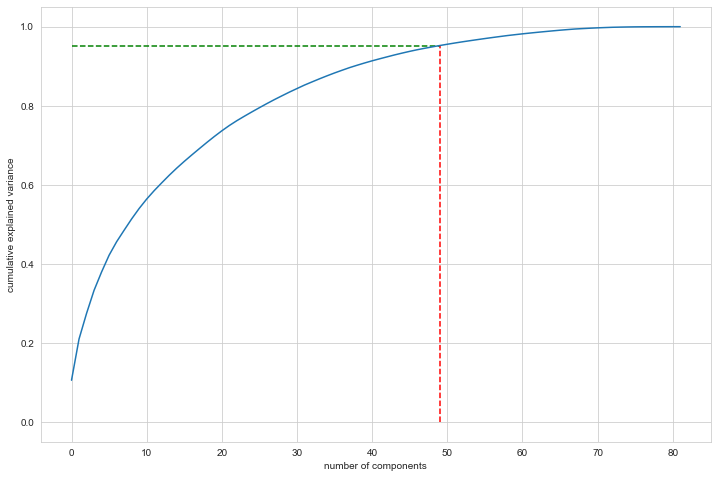

In [ ]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
sns.set_style('whitegrid')
fig = plt.figure(figsize = (12,8))
plt.plot(var_cumu)
plt.hlines(y=0.95, xmax=49, xmin=0, colors="g", linestyles="--")
plt.vlines(x=49, ymax=0.95, ymin=0, colors="r", linestyles="--")  ##Optimal number of features-> 49, explains 95% variance
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

**`Perform Incremental PCA with 49 components. (Explains 95% variance)`**

In [ ]:
from sklearn.decomposition import IncrementalPCA
from sklearn import metrics
pca_final = IncrementalPCA(n_components=49)  ##Incremental PCA using 49 components
df_train_pca = pca_final.fit_transform(X_res)  ##fit_transform train set

In [ ]:
df_train_pca.shape

(38522, 49)

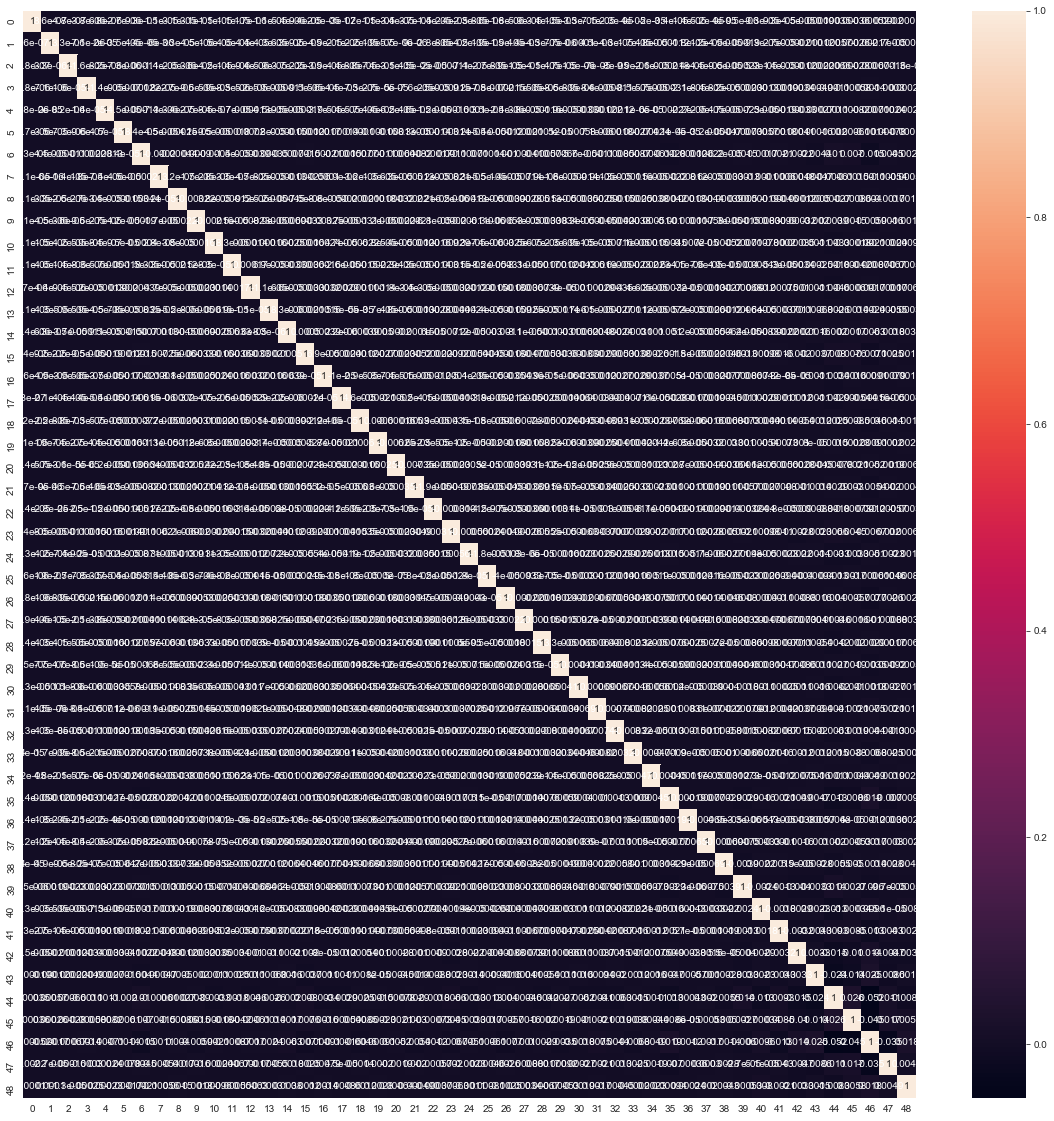

In [ ]:
##Heatmap of PCA components
corrmat = np.corrcoef(df_train_pca.transpose())  ##Correlation matrix
plt.figure(figsize=[20,20])
sns.heatmap(corrmat, annot=True)

In [ ]:
df_test_pca = pca_final.transform(X_test)  #transform test set
df_test_pca.shape

(8986, 49)

In [ ]:
##Note: Copy these variables for future models using pca
X_train_pca = df_train_pca
y_train_pca = y_res
X_test_pca = df_test_pca
y_test_pca = y_test

##### Applying Logistic Regression on the data (on principal components)
Let's check <br><br>
*`(i) Logistic Regression (with PCA and without hyperparameter-tuning)`<br><br>
`(ii) Logistic Regression (with PCA and hyperparameter-tuning)`*

### <font color='Green'>(i) Logistic Regression (with PCA and without hyperparameter-tuning)

In [ ]:
from sklearn.linear_model import LogisticRegression
learner_pca = LogisticRegression()   ##No hyperparameter tuning and class is balanced using SMOTE
model_pca = learner_pca.fit(df_train_pca, y_res)

In [ ]:
pred_probs_train = model_pca.predict_proba(df_train_pca)

In [ ]:
##Getting the predicted values on the train set
y_res_pred= pred_probs_train[:,1]   ##Getting churn probability values(1)
y_res_pred

array([0.01396024, 0.01186393, 0.06017945, ..., 0.95923835, 0.92195489,
       0.60044738])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [ ]:
y_res_pred_final = pd.DataFrame({'Churn':y_res.values, 'Churn_Prob':y_res_pred})
y_res_pred_final['CustID'] = y_res.index    ##CustID is the record index ID
y_res_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.013960,0
1,0,0.011864,1
2,0,0.060179,2
3,1,0.750708,3
4,0,0.003039,4


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [ ]:
y_res_pred_final['predicted'] = y_res_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_res_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.013960,0,0
1,0,0.011864,1,0
2,0,0.060179,2,0
3,1,0.750708,3,1
4,0,0.003039,4,0


Logistic Regression (with PCA) Model Stats Scores Summary : 


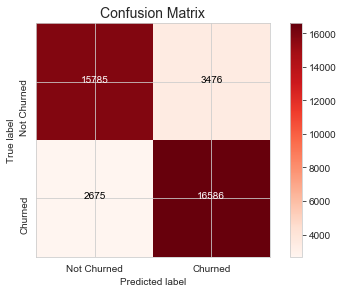

In [ ]:
##Confusion Matrix
confusion = metrics.confusion_matrix(y_res_pred_final.Churn, y_res_pred_final.predicted)
print_model_metrics(y_res_pred_final.Churn, y_res_pred_final.predicted,'Logistic Regression (with PCA)')

In [ ]:
# Let's check the overall accuracy. (train_data)----Balanced Dataset
print(metrics.accuracy_score(y_res_pred_final.Churn, y_res_pred_final.predicted))

0.8403250090857173


###  Plotting the ROC Curve

In [ ]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='(ROC_AUC = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_res_pred_final.Churn, y_res_pred_final.Churn_Prob, drop_intermediate = False )

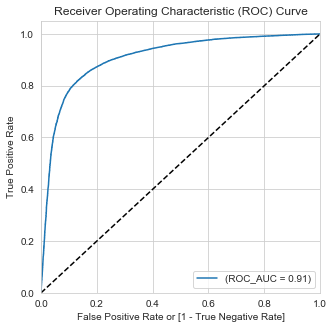

In [ ]:
##ROC curve for train data
draw_roc(y_res_pred_final.Churn, y_res_pred_final.Churn_Prob)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [ ]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_res_pred_final[i]= y_res_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_res_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.013960,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0.011864,1,0,1,0,0,0,0,0,0,0,0,0
2,0,0.060179,2,0,1,0,0,0,0,0,0,0,0,0
3,1,0.750708,3,1,1,1,1,1,1,1,1,1,0,0
4,0,0.003039,4,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
##Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_res_pred_final.Churn, y_res_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0  0.0   0.500000  1.000000  0.000000
0.1  0.1   0.702845  0.972639  0.433051
0.2  0.2   0.762499  0.949120  0.575879
0.3  0.3   0.798738  0.924770  0.672707
0.4  0.4   0.825424  0.897357  0.753492
0.5  0.5   0.840325  0.861118  0.819532
0.6  0.6   0.843622  0.814236  0.873008
0.7  0.7   0.833602  0.751726  0.915477
0.8  0.8   0.788744  0.626551  0.950937
0.9  0.9   0.629277  0.274389  0.984165


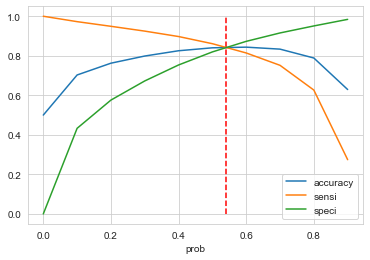

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
%matplotlib inline
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.54, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

#### From the curve above, 0.54 is the optimum point to take it as a cutoff probability.

In [ ]:
y_res_pred_final['final_predicted'] = y_res_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.54 else 0)
y_res_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.013960,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.011864,1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.060179,2,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.750708,3,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.003039,4,0,1,0,0,0,0,0,0,0,0,0,0


Logistic Regression (with PCA) Model Stats Scores Summary : 


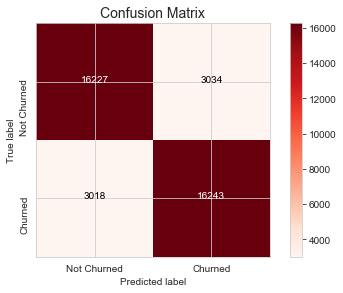

In [ ]:
##Confusion Matrix (optimal train set)
confusion_train_opt = metrics.confusion_matrix(y_res_pred_final.Churn, y_res_pred_final.final_predicted)
print_model_metrics(y_res_pred_final.Churn, y_res_pred_final.final_predicted,'Logistic Regression (with PCA)')

In [ ]:
##Let's compute the evaluation metrics: (train_data)
printbold('**Evaluation Metrics: Train Set (Optimal Cut-off)---[using PCA for feature selection]**')
print("******************************************************************")
print('Accuracy of Train Set: (Logistic Regression Model with PCA):')
print(metrics.accuracy_score(y_res_pred_final.Churn, y_res_pred_final.final_predicted))
print("******************************************************************")

from sklearn.metrics import classification_report
print(classification_report(y_res_pred_final.Churn, y_res_pred_final.final_predicted, target_names=['Not Churned','Churned']))
print("******************************************************************")

print(other_metrics_logistic_model(confusion_train_opt))
print("******************************************************************")
print('ROC of Train Set: (Logistic Regression Model with PCA):')
print("{:2.3}".format(metrics.roc_auc_score(y_res_pred_final.Churn, y_res_pred_final.Churn_Prob)))

**Evaluation Metrics: Train Set (Optimal Cut-off)---[using PCA for feature selection]**

******************************************************************
Accuracy of Train Set: (Logistic Regression Model with PCA):
0.8428949691085613
******************************************************************
              precision    recall  f1-score   support

 Not Churned       0.84      0.84      0.84     19261
     Churned       0.84      0.84      0.84     19261

    accuracy                           0.84     38522
   macro avg       0.84      0.84      0.84     38522
weighted avg       0.84      0.84      0.84     38522

******************************************************************
                            Value
Evaluation Metrics               
Sensitivity                0.8433
Specificity                0.8425
False Positive Rate        0.1575
Positive Predictive Value  0.8426
Negative Predictive Value  0.8432
Misclassification Rate     0.1571
******************************************************************
ROC of Train Set: (Logistic Regression Model with PCA

**Observation:**<br>After finding optimal cut-off,<br>(i) `ROC-AUC` of Train Set: `0.91`<br>(ii) `Recall Score` of Train Set: `0.84`

### Precision and Recall Trade-off

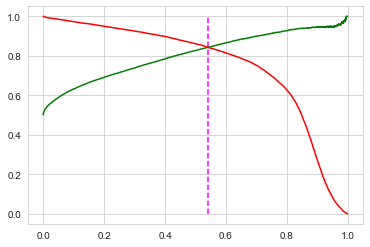

In [ ]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_res_pred_final.Churn, y_res_pred_final.Churn_Prob)

plt.plot(thresholds, p[:-1], "g-")  ##Precision: green-line
plt.plot(thresholds, r[:-1], "r-")  ##Recall: red-line
plt.vlines(x=0.54, ymax=1, ymin=0, colors='magenta', linestyles="--")
plt.show()


### Prediction and Evaluation: Test Set

In [ ]:
##Making predictions on Test Set
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [ ]:
##Getting the predicted values on the test set
y_test_pred= pred_probs_test[:,1]   ##Getting churn probability values(1)
y_test_pred

array([4.29634424e-01, 4.60859772e-05, 5.50356499e-01, ...,
       1.74557217e-01, 2.60846739e-02, 2.98513493e-01])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [ ]:
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['CustID'] = y_test.index    ##CustID is the record index ID
y_test_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.429634,73764
1,0,0.000046,18280
2,0,0.550356,43793
3,0,0.193106,69530
4,0,0.031356,71555


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.54 (optimal cut-off) else 0

In [ ]:
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.54 else 0)  ##optimal cut-off is 0.54
y_test_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.429634,73764,0
1,0,0.000046,18280,0
2,0,0.550356,43793,1
3,0,0.193106,69530,0
4,0,0.031356,71555,0


Logistic Regression (with PCA) Model Stats Scores Summary : 


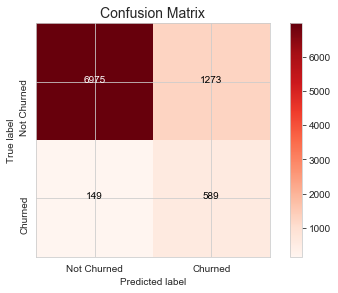

In [ ]:
##Confusion Matrix (optimal test set)
confusion_test_opt = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted)
print_model_metrics(y_test_pred_final.Churn, y_test_pred_final.predicted, 'Logistic Regression (with PCA)')

In [ ]:
## Let's check the overall accuracy. (test_data)
printbold('**Evaluation Metrics: Test Set (Optimal Cut-off)---[using PCA for Feature Selection]**')
print("******************************************************************")
print('Accuracy of Test Set: (Logistic Regression Model with PCA):')
accuracy_score_pca_no_hyp = metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted)
print(accuracy_score_pca_no_hyp)
print("******************************************************************")

from sklearn.metrics import classification_report
class_rep_pc_no_hyp = classification_report(y_test_pred_final.Churn, y_test_pred_final.predicted,\
                                         target_names=['Not Churned','Churned'])
print(class_rep_pc_no_hyp)  # target_names=target_names
print("******************************************************************")

confusion_test_opt_pca_no_hyp = confusion_test_opt
print(other_metrics_logistic_model(confusion_test_opt_pca_no_hyp))
print("******************************************************************")
print('ROC of Test Set: (Logistic Regression Model with PCA):')
auc_roc_pca_no_hyp = metrics.roc_auc_score(y_test_pred_final.Churn, y_test_pred_final.Churn_Prob)
print("{:2.3}".format(auc_roc_pca_no_hyp))

**Evaluation Metrics: Test Set (Optimal Cut-off)---[using PCA for Feature Selection]**

******************************************************************
Accuracy of Test Set: (Logistic Regression Model with PCA):
0.8417538393055864
******************************************************************
              precision    recall  f1-score   support

 Not Churned       0.98      0.85      0.91      8248
     Churned       0.32      0.80      0.45       738

    accuracy                           0.84      8986
   macro avg       0.65      0.82      0.68      8986
weighted avg       0.92      0.84      0.87      8986

******************************************************************
                            Value
Evaluation Metrics               
Sensitivity                0.7981
Specificity                0.8457
False Positive Rate        0.1543
Positive Predictive Value  0.3163
Negative Predictive Value  0.9791
Misclassification Rate     0.1582
******************************************************************
ROC of Test Set: (Logistic Regression Model with PCA):

**Observation:**<br>After finding optimal cut-off,<br>(i) `ROC-AUC` of Test Set: `0.896`<br>(ii) `Recall Score` of Train Set: `0.80`

### <font color='Green'>(ii) Logistic Regression (with PCA and hyperparameter-tuning)

**L2 Regularization:** (Supported Solvers: *'newton-cg', 'lbfgs', 'liblinear', 'sag'*)

In [ ]:
# Example of grid searching key hyperparametres for logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag']
penalty = ['l2']
c_values = np.logspace(-3,3,10)   ##Lambda= 1/c_values (Here, c_values range from 0.001 to 1000)

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1_macro',error_score=0)
grid_result = grid_search.fit(X=df_train_pca, y=y_res)   ##Note: (X,y) = (df_train_pca, y_res)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.839974 using {'C': 10.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.836106 (0.006155) with: {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
0.836106 (0.006155) with: {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
0.835591 (0.006157) with: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
0.836115 (0.006147) with: {'C': 0.001, 'penalty': 'l2', 'solver': 'sag'}
0.839056 (0.005869) with: {'C': 0.004641588833612777, 'penalty': 'l2', 'solver': 'newton-cg'}
0.839064 (0.005862) with: {'C': 0.004641588833612777, 'penalty': 'l2', 'solver': 'lbfgs'}
0.838700 (0.005753) with: {'C': 0.004641588833612777, 'penalty': 'l2', 'solver': 'liblinear'}
0.839056 (0.005869) with: {'C': 0.004641588833612777, 'penalty': 'l2', 'solver': 'sag'}
0.839578 (0.006076) with: {'C': 0.021544346900318832, 'penalty': 'l2', 'solver': 'newton-cg'}
0.839569 (0.006082) with: {'C': 0.021544346900318832, 'penalty': 'l2', 'solver': 'lbfgs'}
0.839549 (0.006066) with: {'C': 0.021544346900318832, 'penalty': 'l2', 

**Observation:** Using, `L2 Regularization` we get, the best model has the following hyperparameters:<br>`Best: f1_macro  0.839974 using {'C': 10.0, 'penalty': 'l2', 'solver': 'newton-cg'}`

**L1 Regularization:** (Supported Solvers: *'liblinear', 'saga'*)

In [ ]:
# Example of grid searching key hyperparametres for logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# define models and parameters
model = LogisticRegression()
solvers = ['liblinear', 'saga']
penalty = ['l1']
c_values = np.logspace(-3,3,10)   ##Lambda= 1/c_values (Here, c_values range from 0.001 to 1000)

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1_macro',error_score=0)
grid_result = grid_search.fit(X=df_train_pca, y=y_res)   ##Note: (X,y) = (df_train_pca, y_res)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.839983 using {'C': 10.0, 'penalty': 'l1', 'solver': 'saga'}
0.809751 (0.006552) with: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
0.817348 (0.007181) with: {'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}
0.832017 (0.005985) with: {'C': 0.004641588833612777, 'penalty': 'l1', 'solver': 'liblinear'}
0.833405 (0.006005) with: {'C': 0.004641588833612777, 'penalty': 'l1', 'solver': 'saga'}
0.838167 (0.006102) with: {'C': 0.021544346900318832, 'penalty': 'l1', 'solver': 'liblinear'}
0.838486 (0.006139) with: {'C': 0.021544346900318832, 'penalty': 'l1', 'solver': 'saga'}
0.839637 (0.006024) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
0.839690 (0.006102) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.839879 (0.006091) with: {'C': 0.46415888336127775, 'penalty': 'l1', 'solver': 'liblinear'}
0.839905 (0.006127) with: {'C': 0.46415888336127775, 'penalty': 'l1', 'solver': 'saga'}
0.839940 (0.006142) with: {'C': 2.154434690031882, 'penalty': 'l1', 'solver': 'libl

**Observation:** Using, `L1 Regularization` we get, the best model has the following hyperparameters:<br>`Best: f1_macro 0.839992 using {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}`

**Best Choice of Hyperparameters for model building** <br>
`*L1 Regularization: f1_macro 0.839992 using {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}`

In [ ]:
##Using Best Choice: L1 Regularization: f1_macro 0.839992 using {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, roc_auc_score

##Retrieving pca train and tests sets
df_train_pca = X_train_pca.copy()
y_res= y_train_pca.copy()
df_test_pca = X_test_pca.copy()
y_test = y_test_pca.copy()


THRESHOLD = 0.54    ##(optimal cut-off as derived in previous model)
lassoclf = LogisticRegression(C= 10, penalty= 'l1', solver= 'liblinear', random_state= 42) #optimal hyperparameters
lassoclf.fit(df_train_pca, y_res)

printbold("**For Logistic Regression Model (with PCA and Hyperparameter Tuning):**");
print('L2 Regularisation(lasso)    Optimal Threshold:',THRESHOLD); print("*"*70)

##Baseline Model (Train Data Performance: Before SMOTE):
printbold('**Baseline Model (Class Imbalance Dataset: Before SMOTE):**')
print("For Train Set (Class Imbalance Dataset):\n", classification_report_base_mod_train);  print("-"*70)
print("For Test Set (Prediction: Class Imbalance Dataset):\n", classification_report_base_mod_test); print("*"*70)

# predict using train data (After SMOTE: Oversampled Minority Class)
train_pred_prob = lassoclf.predict_proba(df_train_pca)
train_pred_prob_val = pd.DataFrame((train_pred_prob)[:,1]).values.reshape(-1)
train_pred = np.where(train_pred_prob[:,1] > THRESHOLD, 1, 0)

printbold("**For Training Set (Class Balanced: After SMOTETomek:):**"); print("ROC_AUC_Score:", round(roc_auc_score(y_res, train_pred_prob_val),4))
print("Accuracy:", round(accuracy_score(y_res, train_pred),4))
print(classification_report(y_res, train_pred, target_names=['Not Churned','Churned'])); print("-"*70)
confusion_train_log_pca = metrics.confusion_matrix(y_res, train_pred)
print(other_metrics_logistic_model(confusion_train_log_pca))

# predict using test data
print("*"*70)
test_pred_prob = lassoclf.predict_proba(df_test_pca)
test_pred_prob_val = pd.DataFrame((test_pred_prob)[:,1]).values.reshape(-1)
test_pred = np.where(test_pred_prob[:,1] > THRESHOLD, 1, 0)
printbold("**For Test Set (Prediction):**"); print("ROC_AUC_Score:", round(roc_auc_score(y_test, test_pred_prob_val),4))
print("Accuracy:", round(accuracy_score(y_test, test_pred),4))
print(classification_report(y_test, test_pred, target_names=['Not Churned','Churned'])); print("-"*70)

confusion_test_log_pca = metrics.confusion_matrix(y_test, test_pred)
print(other_metrics_logistic_model(confusion_test_log_pca)); print("*"*70)

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

**For Logistic Regression Model (with PCA and Hyperparameter Tuning):**

L2 Regularisation(lasso)    Optimal Threshold: 0.54
**********************************************************************


**Baseline Model (Class Imbalance Dataset: Before SMOTE):**

For Train Set (Class Imbalance Dataset):
               precision    recall  f1-score   support

 Not Churned       0.94      0.99      0.96     19272
     Churned       0.68      0.27      0.39      1695

    accuracy                           0.93     20967
   macro avg       0.81      0.63      0.68     20967
weighted avg       0.92      0.93      0.92     20967

----------------------------------------------------------------------
For Test Set (Prediction: Class Imbalance Dataset):
               precision    recall  f1-score   support

 Not Churned       0.94      0.99      0.96      8248
     Churned       0.73      0.29      0.41       738

    accuracy                           0.93      8986
   macro avg       0.84      0.64      0.69      8986
weighted avg       0.92      0.93      0.92      8986

**********************************************************************


**For Training Set (Class Balanced: After SMOTETomek:):**

ROC_AUC_Score: 0.9097
Accuracy: 0.8429
              precision    recall  f1-score   support

 Not Churned       0.84      0.84      0.84     19261
     Churned       0.84      0.84      0.84     19261

    accuracy                           0.84     38522
   macro avg       0.84      0.84      0.84     38522
weighted avg       0.84      0.84      0.84     38522

----------------------------------------------------------------------
                            Value
Evaluation Metrics               
Sensitivity                0.8433
Specificity                0.8425
False Positive Rate        0.1575
Positive Predictive Value  0.8426
Negative Predictive Value  0.8431
Misclassification Rate     0.1571
**********************************************************************


**For Test Set (Prediction):**

ROC_AUC_Score: 0.8962
Accuracy: 0.8416
              precision    recall  f1-score   support

 Not Churned       0.98      0.85      0.91      8248
     Churned       0.32      0.80      0.45       738

    accuracy                           0.84      8986
   macro avg       0.65      0.82      0.68      8986
weighted avg       0.92      0.84      0.87      8986

----------------------------------------------------------------------
                            Value
Evaluation Metrics               
Sensitivity                0.7981
Specificity                0.8455
False Positive Rate        0.1545
Positive Predictive Value  0.3162
Negative Predictive Value  0.9791
Misclassification Rate     0.1584
**********************************************************************


**Observation:**<br>After using `*Logistic Regression (with PCA and Hyperparameter Tuning)*`,<br> Considering the optimal cut-off and hyperparameters we get,<br>(i)`ROC_AUC` of Test Set: `0.8962`<br>(ii)`Recall Score` of Test Set: `0.80`<br>

## <font color='Brown'> (1.2) Random Forest with PCA

In [ ]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [ ]:
# fit
rfc.fit(df_train_pca,y_res)

RandomForestClassifier()

In [ ]:
# Making predictions
rf_predictions = rfc.predict(df_test_pca)

In [ ]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
# Let's check the report of our default model
print(classification_report(y_test,rf_predictions,target_names=['Not Churned','Churned']))

              precision    recall  f1-score   support

 Not Churned       0.96      0.95      0.95      8248
     Churned       0.48      0.55      0.51       738

    accuracy                           0.91      8986
   macro avg       0.72      0.75      0.73      8986
weighted avg       0.92      0.91      0.92      8986



In [ ]:
print(accuracy_score(y_test,rf_predictions))

0.9134208769196528


**Hyperparameter Tuning**

Finding the optimal ranges for hyperparameters for the final gridsearch operation<br>
(i) 'max_features'<br>
(ii) 'max_depth'<br>
(iii) 'min_samples_leaf'<br>
(iv) 'n_estimators'<br>
(v) 'min_samples_split'<br>
(vi) 'max_samples'<br>
(vii) 'max_leaf_nodes'<br>


#### Tuning 'max_features'

In [ ]:
##max_features= sqrt(n_features)
#Since number of features in our pca model are 49.

*'max_features': [7]*

#### Tuning 'max_depth'

In [ ]:
# GridSearchCV to find optimal 'max_depth'
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(4, 40, 4)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters,
                    cv=n_folds,
                   scoring="f1_macro", return_train_score=True)
rf.fit(df_train_pca,y_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(4, 40, 4)}, return_train_score=True,
             scoring='f1_macro')

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,9.773793,0.080860,0.081520,0.005861,4,{'max_depth': 4},0.803077,0.816502,0.817020,0.824671,0.809160,0.814086,0.007375,9,0.814478,0.819707,0.818008,0.814565,0.817661,0.816884,0.002050
1,17.558720,1.027613,0.109616,0.002611,8,{'max_depth': 8},0.865886,0.866530,0.871617,0.873819,0.867857,0.869142,0.003068,8,0.888304,0.886479,0.884569,0.888011,0.889370,0.887347,0.001669
2,22.418723,0.247779,0.146423,0.003976,12,{'max_depth': 12},0.925092,0.919780,0.924053,0.926507,0.922470,0.923580,0.002313,7,0.960782,0.960035,0.958318,0.960879,0.962799,0.960563,0.001447
3,25.704731,0.528301,0.170149,0.006304,16,{'max_depth': 16},0.946111,0.941576,0.946889,0.947666,0.943882,0.945225,0.002220,6,0.983219,0.982894,0.983447,0.983317,0.983674,0.983310,0.000258
4,27.543167,0.152765,0.182489,0.011258,20,{'max_depth': 20},0.952999,0.950539,0.954555,0.952086,0.948569,0.951750,0.002055,5,0.989615,0.989875,0.990200,0.989843,0.990167,0.989940,0.000218


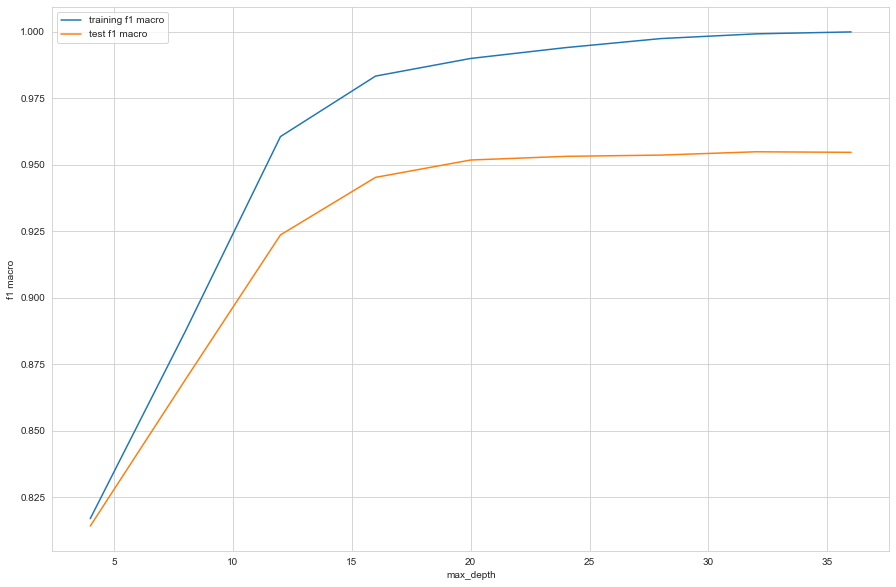

In [ ]:
# plotting f1 score with max_depth
plt.figure(figsize=(15,10))
plt.plot(scores["param_max_depth"],
         scores["mean_train_score"],
         label="training f1 macro")
plt.plot(scores["param_max_depth"],
         scores["mean_test_score"],
         label="test f1 macro")
plt.xlabel("max_depth")
plt.ylabel("f1 macro")
plt.legend()
plt.show()


In [ ]:
my_df= pd.DataFrame()
my_df['mean_train_score']=rf.cv_results_['mean_train_score']
my_df['mean_test_score']=rf.cv_results_['mean_test_score']
my_df['diff'] = my_df['mean_train_score'] - my_df['mean_test_score']
#my_df.sort_values(by='diff', ascending= False)
my_df

,mean_train_score,mean_test_score,diff
0,0.816884,0.814086,0.002798
1,0.887347,0.869142,0.018205
2,0.960563,0.923580,0.036982
3,0.983310,0.945225,0.038086
4,0.989940,0.951750,0.038190
5,0.994023,0.953130,0.040892
6,0.997417,0.953599,0.043818
7,0.999189,0.954847,0.044342
8,0.999922,0.954638,0.045284


*Considering 'max_depth': [24, 25]*

#### Tuning 'min_samples_leaf'

In [ ]:
# GridSearchCV to find optimal 'min_samples_leaf'
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 600, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters,
                    cv=n_folds,
                   scoring="f1_macro", return_train_score=True)
rf.fit(df_train_pca,y_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(100, 600, 50)},
             return_train_score=True, scoring='f1_macro')

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,19.834689,0.473491,0.137943,0.010815,100,{'min_samples_leaf': 100},0.848041,0.856955,0.861042,0.865075,0.849077,0.856038,0.006632,1,0.868274,0.866417,0.867500,0.868281,0.867171,0.867529,0.000705
1,17.983608,0.452560,0.120262,0.004965,150,{'min_samples_leaf': 150},0.838319,0.843371,0.850481,0.854130,0.842704,0.845801,0.005705,2,0.855392,0.854660,0.854164,0.854729,0.857171,0.855223,0.001049
2,16.647484,0.197383,0.112975,0.006839,200,{'min_samples_leaf': 200},0.832140,0.840442,0.842899,0.848238,0.838741,0.840492,0.005266,3,0.847258,0.845822,0.846958,0.847698,0.848199,0.847187,0.000801
3,15.887304,1.321506,0.107350,0.013790,250,{'min_samples_leaf': 250},0.822119,0.836770,0.839886,0.840911,0.831458,0.834229,0.006891,4,0.843015,0.839892,0.840878,0.841110,0.842076,0.841394,0.001067
4,13.268153,0.760221,0.092190,0.010109,300,{'min_samples_leaf': 300},0.814637,0.827261,0.827866,0.838652,0.823200,0.826323,0.007766,5,0.834180,0.834369,0.830219,0.833986,0.834303,0.833411,0.001602


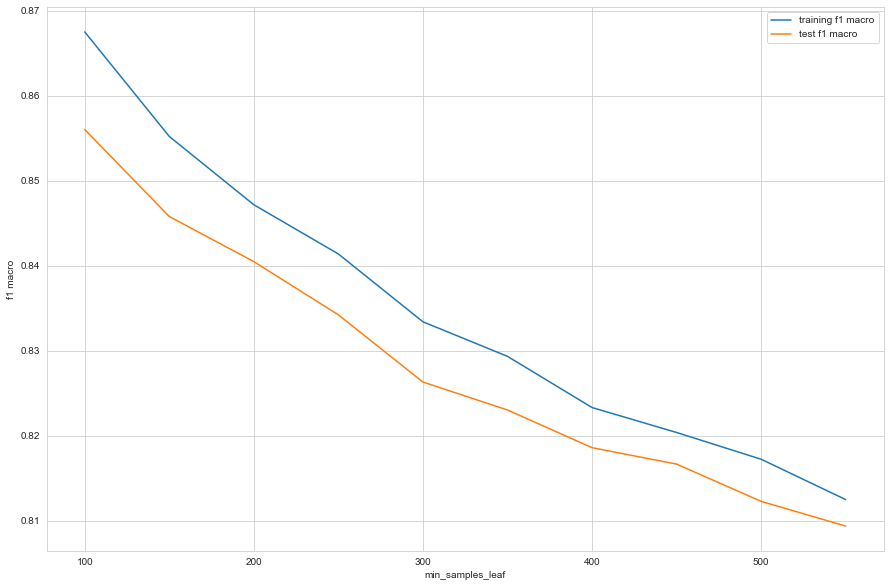

In [ ]:
# plotting f1 score with 'min_samples_leaf'
plt.figure(figsize=(15,10))
plt.plot(scores["param_min_samples_leaf"],
         scores["mean_train_score"],
         label="training f1 macro")
plt.plot(scores["param_min_samples_leaf"],
         scores["mean_test_score"],
         label="test f1 macro")
plt.xlabel("min_samples_leaf")
plt.ylabel("f1 macro")
plt.legend()
plt.show()


In [ ]:
my_df= pd.DataFrame()
my_df['mean_train_score']=rf.cv_results_['mean_train_score']
my_df['mean_test_score']=rf.cv_results_['mean_test_score']
my_df['diff'] = my_df['mean_train_score'] - my_df['mean_test_score']
#my_df.sort_values(by='diff', ascending= False)
my_df

,mean_train_score,mean_test_score,diff
0,0.867529,0.856038,0.011491
1,0.855223,0.845801,0.009422
2,0.847187,0.840492,0.006695
3,0.841394,0.834229,0.007165
4,0.833411,0.826323,0.007088
5,0.829346,0.823033,0.006313
6,0.823322,0.818597,0.004725
7,0.820385,0.816668,0.003718
8,0.817238,0.812281,0.004957
9,0.812489,0.809369,0.003120


*Considering 'min_samples_leaf': [100,200,300]*

#### Tuning n_estimators

In [ ]:
# GridSearchCV to find optimal 'n_estimators'
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 600, 100)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters,
                    cv=n_folds,
                   scoring="f1_macro", return_train_score=True)
rf.fit(df_train_pca,y_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': range(100, 600, 100)},
             return_train_score=True, scoring='f1_macro')

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,31.500830,0.307714,0.210012,0.007377,100,{'n_estimators': 100},0.955083,0.952232,0.955342,0.956507,0.952080,0.954249,0.001775,5,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,63.013764,0.767642,0.411827,0.009804,200,{'n_estimators': 200},0.957676,0.952750,0.957158,0.956247,0.953512,0.955468,0.001978,3,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,94.053848,0.682887,0.627428,0.016064,300,{'n_estimators': 300},0.957026,0.953790,0.956508,0.957025,0.953120,0.955494,0.001689,2,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,100.221472,11.105893,0.656870,0.032194,400,{'n_estimators': 400},0.958066,0.952752,0.957027,0.956766,0.952343,0.955391,0.002365,4,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,113.559998,2.077770,0.743412,0.015049,500,{'n_estimators': 500},0.956897,0.953528,0.957937,0.957805,0.952342,0.955702,0.002318,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0


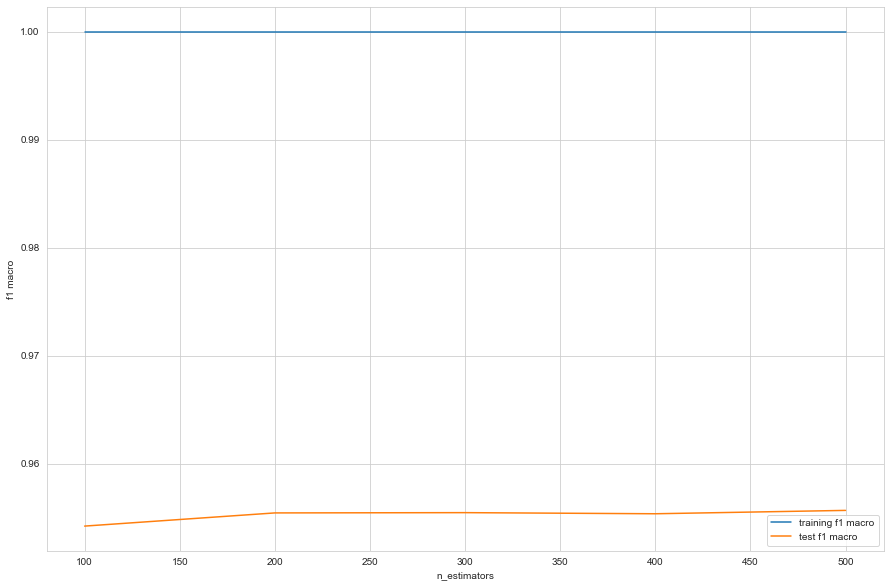

In [ ]:
# plotting f1 score with 'n_estimators'
plt.figure(figsize=(15,10))
plt.plot(scores["param_n_estimators"],
         scores["mean_train_score"],
         label="training f1 macro")
plt.plot(scores["param_n_estimators"],
         scores["mean_test_score"],
         label="test f1 macro")
plt.xlabel("n_estimators")
plt.ylabel("f1 macro")
plt.legend()
plt.show()


In [ ]:
my_df= pd.DataFrame()
my_df['mean_train_score']=rf.cv_results_['mean_train_score']
my_df['mean_test_score']=rf.cv_results_['mean_test_score']
my_df['diff'] = my_df['mean_train_score'] - my_df['mean_test_score']
#my_df.sort_values(by='diff', ascending= False)
my_df

,mean_train_score,mean_test_score,diff
0,1.0,0.954249,0.045751
1,1.0,0.955468,0.044532
2,1.0,0.955494,0.044506
3,1.0,0.955391,0.044609
4,1.0,0.955702,0.044298


*Considering n_estimators: 300*

#### Tuning 'min_samples_split'

In [ ]:
# GridSearchCV to find optimal 'min_samples_split'
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(0, 800, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters,
                    cv=n_folds,
                   scoring="f1_macro", return_train_score=True)
rf.fit(df_train_pca,y_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': range(0, 800, 50)},
             return_train_score=True, scoring='f1_macro')

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.058242,0.003123,0.000000,0.000000,0,{'min_samples_split': 0},NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22.313342,0.493034,0.141022,0.006723,50,{'min_samples_split': 50},0.908090,0.912774,0.917569,0.916662,0.914460,0.913911,0.003359,1,0.955608,0.955868,0.955188,0.955643,0.954766,0.955415,0.000392
2,21.085500,0.174510,0.123470,0.004001,100,{'min_samples_split': 100},0.883218,0.892341,0.895475,0.895866,0.892379,0.891856,0.004567,2,0.924210,0.921743,0.921356,0.921847,0.921451,0.922121,0.001060
3,20.839828,0.857145,0.125060,0.015094,150,{'min_samples_split': 150},0.870840,0.878807,0.886501,0.884944,0.879382,0.880095,0.005520,3,0.906334,0.903867,0.903259,0.903611,0.903574,0.904129,0.001119
4,19.713820,0.325243,0.119685,0.012339,200,{'min_samples_split': 200},0.863640,0.873986,0.877513,0.877000,0.869745,0.872377,0.005169,4,0.894263,0.892690,0.891453,0.891538,0.891995,0.892388,0.001035


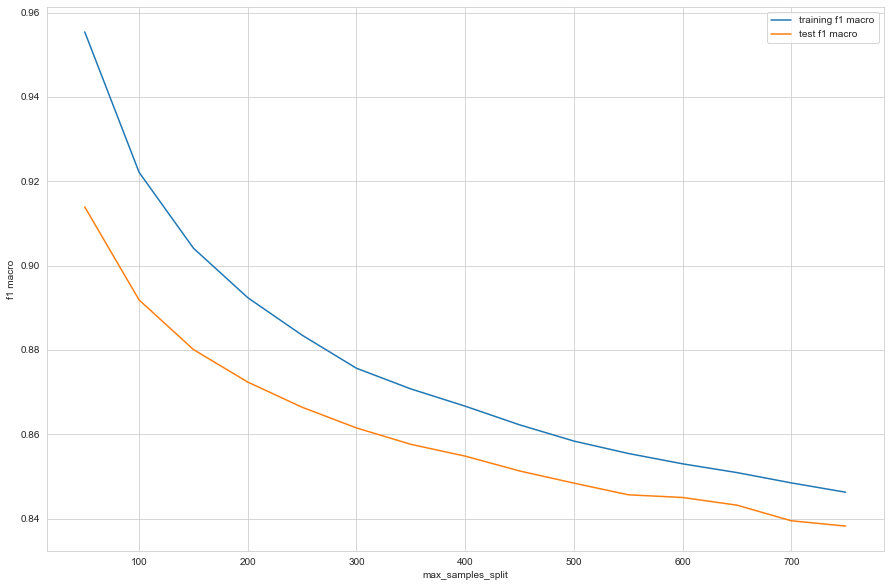

In [ ]:
# plotting f1 score with 'min_samples_split'
plt.figure(figsize=(15,10))
plt.plot(scores["param_min_samples_split"],
         scores["mean_train_score"],
         label="training f1 macro")
plt.plot(scores["param_min_samples_split"],
         scores["mean_test_score"],
         label="test f1 macro")
#plt.vlines(x=24, ymax=1, ymin=0.825, colors='magenta', linestyles="--")
#plt.vlines(x=28, ymax=1, ymin=0.825, colors='red', linestyles="--")
plt.xlabel("max_samples_split")
plt.ylabel("f1 macro")
plt.legend()
plt.show()


In [ ]:
my_df= pd.DataFrame()
my_df['mean_train_score']=rf.cv_results_['mean_train_score']
my_df['mean_test_score']=rf.cv_results_['mean_test_score']
my_df['diff'] = my_df['mean_train_score'] - my_df['mean_test_score']
#my_df.sort_values(by='diff', ascending= False)
my_df

,mean_train_score,mean_test_score,diff
0,NaN,NaN,NaN
1,0.955415,0.913911,0.041504
2,0.922121,0.891856,0.030266
3,0.904129,0.880095,0.024034
4,0.892388,0.872377,0.020011
5,0.883497,0.866412,0.017085
6,0.875655,0.861505,0.014149
7,0.870760,0.857620,0.013139
8,0.866666,0.854820,0.011846
9,0.862244,0.851310,0.010934


*Considering, 'min_samples_split': [250,350,450]*

#### Tuning 'max_samples' (bootstrap samples)

>0.1 0.898 (0.006)
>0.2 0.922 (0.004)
>0.3 0.936 (0.005)
>0.4 0.942 (0.004)
>0.5 0.947 (0.004)
>0.6 0.951 (0.003)
>0.7 0.953 (0.003)
>0.8 0.955 (0.003)
>0.9 0.956 (0.003)
>1.0 0.958 (0.003)


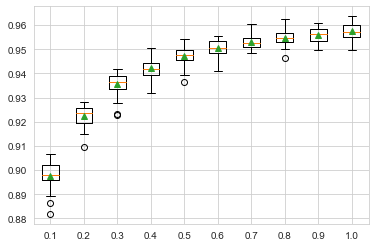

In [ ]:
# explore random forest bootstrap sample size on performance
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

##Note: Copy these variables for future models using pca
X_train_pca = df_train_pca
y_train_pca = y_res
X_test_pca = df_test_pca
y_test_pca = y_test


# get a list of models to evaluate
def get_models():
    models = dict()
    # explore ratios from 10% to 100% in 10% increments
    for i in arange(0.1, 1.1, 0.1):
        key = '%.1f' % i
        # set max_samples=None to use 100%
        if i == 1.0:
            i = None
        models[key] = RandomForestClassifier(max_samples=i)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='f1_macro', cv=cv, n_jobs=-1)
    return scores


# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X=df_train_pca, y=y_res)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

*Considering, max_samples: 1.0*

#### Tuning 'max_leaf_nodes'

In [ ]:
# GridSearchCV to find optimal 'max_leaf_nodes'
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_leaf_nodes': range(0, 100, 13)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters,
                    cv=n_folds,
                   scoring="f1_macro", return_train_score=True)
rf.fit(df_train_pca,y_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_leaf_nodes': range(0, 100, 13)},
             return_train_score=True, scoring='f1_macro')

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.069621,0.008112,0.000000,0.000000,0,{'max_leaf_nodes': 0},NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10.384027,0.544278,0.066631,0.002700,13,{'max_leaf_nodes': 13},0.797816,0.800292,0.808222,0.814922,0.804029,0.805056,0.006058,7,0.812932,0.808050,0.812177,0.808570,0.809493,0.810244,0.001957
2,13.396136,0.755606,0.090156,0.018703,26,{'max_leaf_nodes': 26},0.821411,0.831778,0.829415,0.837770,0.821786,0.828432,0.006210,6,0.835876,0.836271,0.832180,0.833456,0.835778,0.834712,0.001607
3,15.303431,0.113330,0.093157,0.003373,39,{'max_leaf_nodes': 39},0.833330,0.842533,0.842768,0.850463,0.836589,0.841137,0.005886,5,0.848701,0.849246,0.847167,0.847923,0.848557,0.848319,0.000714
4,16.082338,0.330252,0.098345,0.002238,52,{'max_leaf_nodes': 52},0.840200,0.848848,0.852437,0.855192,0.843080,0.847951,0.005606,4,0.858881,0.856938,0.858661,0.857316,0.856278,0.857615,0.001003


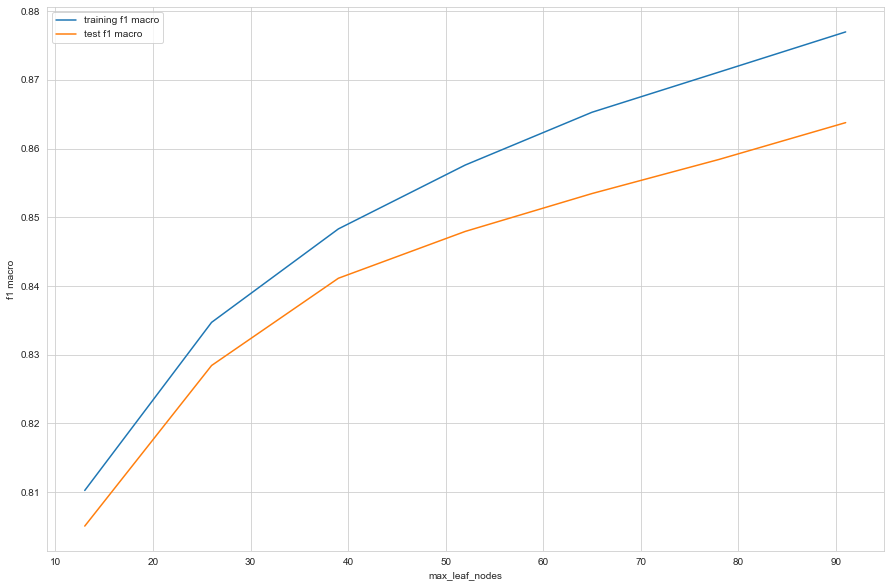

In [ ]:
# plotting f1 score with 'max_leaf_nodes'
plt.figure(figsize=(15,10))
plt.plot(scores["param_max_leaf_nodes"],
         scores["mean_train_score"],
         label="training f1 macro")
plt.plot(scores["param_max_leaf_nodes"],
         scores["mean_test_score"],
         label="test f1 macro")
plt.xlabel("max_leaf_nodes")
plt.ylabel("f1 macro")
plt.legend()
plt.show()


In [ ]:
my_df= pd.DataFrame()
my_df['mean_train_score']=rf.cv_results_['mean_train_score']
my_df['mean_test_score']=rf.cv_results_['mean_test_score']
my_df['diff'] = my_df['mean_train_score'] - my_df['mean_test_score']
#my_df.sort_values(by='diff', ascending= False)
my_df

,mean_train_score,mean_test_score,diff
0,NaN,NaN,NaN
1,0.810244,0.805056,0.005188
2,0.834712,0.828432,0.006280
3,0.848319,0.841137,0.007182
4,0.857615,0.847951,0.009664
5,0.865302,0.853467,0.011835
6,0.871140,0.858425,0.012715
7,0.876998,0.863791,0.013206


*Considering, 'max_leaf_nodes': [25, 27]*

In [ ]:
# Create the parameter grid based on the results
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_features': [7],
    'max_depth': [24,25],
    'min_samples_leaf': [100, 200, 300],
    'n_estimators': [300],
    'min_samples_split': [250,350,450],
    'max_leaf_nodes': [25,27]
}

# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring= 'f1_macro',  ##scoring= 'f1_macro'
                          cv = 5, n_jobs = -1,verbose = 1)

In [ ]:
# Fit the grid search to the data
grid_search.fit(df_train_pca, y_res)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 24.6min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [24, 25], 'max_features': [7],
                         'max_leaf_nodes': [25, 27],
                         'min_samples_leaf': [100, 200, 300],
                         'min_samples_split': [250, 350, 450],
                         'n_estimators': [300]},
             scoring='f1_macro', verbose=1)

In [ ]:
# printing the optimal f1_macro score and hyperparameters
print('We can get f1_macro of',grid_search.best_score_,'using',grid_search.best_params_)

We can get f1_macro of 0.8304929391594534 using {'max_depth': 25, 'max_features': 7, 'max_leaf_nodes': 27, 'min_samples_leaf': 100, 'min_samples_split': 250, 'n_estimators': 300}


In [ ]:
## Creating the model using the above hyperparameter
rf_final = RandomForestClassifier(bootstrap=True,
                             max_depth=24,
                             max_features=7,
                             max_leaf_nodes=27,
                             min_samples_leaf=100,
                             min_samples_split=250,
                             n_estimators=300)

In [ ]:
# fit
rf_final.fit(df_train_pca, y_res)

RandomForestClassifier(max_depth=24, max_features=7, max_leaf_nodes=27,
                       min_samples_leaf=100, min_samples_split=250,
                       n_estimators=300)

In [ ]:
predrf_probs_train = rf_final.predict_proba(df_train_pca)

In [ ]:
##Getting the predicted values on the train set
y_res_predrf = predrf_probs_train[:,1]##Getting churn probability values(1)

In [ ]:
y_res_predrf_final = pd.DataFrame({'Churn':y_res.values, 'Churn_Prob':y_res_predrf})
y_res_predrf_final['CustID'] = y_res.index    ##CustID is the record index ID
y_res_predrf_final.head()

,Churn,Churn_Prob,CustID
0,0,0.319085,0
1,0,0.204337,1
2,0,0.165972,2
3,1,0.760076,3
4,0,0.155986,4


In [ ]:
##Lets assume that the optimal cutoff is 0.5

y_res_predrf_final['predicted'] = y_res_predrf_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_res_predrf_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.319085,0,0
1,0,0.204337,1,0
2,0,0.165972,2,0
3,1,0.760076,3,1
4,0,0.155986,4,0


Random Forest (with PCA) Model Stats Scores Summary : 


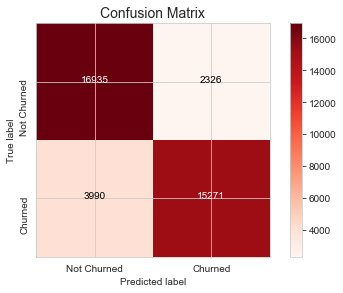

In [ ]:
##Confusion Matrix
confusion = metrics.confusion_matrix(y_res_predrf_final.Churn, y_res_predrf_final.predicted)
print_model_metrics(y_res_predrf_final.Churn, y_res_predrf_final.predicted,'Random Forest (with PCA)')

In [ ]:
# Let's check the overall accuracy. (train_data)
print(metrics.accuracy_score(y_res_predrf_final.Churn, y_res_predrf_final.predicted))

0.8360417423809771


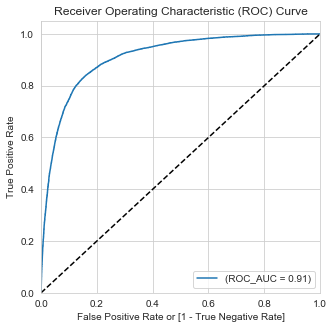

In [ ]:
fpr_rf, tp_rf, thresholds_rf = metrics.roc_curve( y_res_predrf_final.Churn, y_res_predrf_final.Churn_Prob, drop_intermediate = False )
##ROC curve for train data
draw_roc(y_res_predrf_final.Churn, y_res_predrf_final.Churn_Prob)

In [ ]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_res_predrf_final[i]= y_res_predrf_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_res_predrf_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.319085,0,0,1,1,1,1,0,0,0,0,0,0
1,0,0.204337,1,0,1,1,1,0,0,0,0,0,0,0
2,0,0.165972,2,0,1,1,0,0,0,0,0,0,0,0
3,1,0.760076,3,1,1,1,1,1,1,1,1,1,0,0
4,0,0.155986,4,0,1,1,0,0,0,0,0,0,0,0


In [ ]:
##Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoffrf_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_res_predrf_final.Churn, y_res_predrf_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoffrf_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoffrf_df)

     prob  accuracy     sensi     speci
0.0  0.0   0.500000  1.000000  0.000000
0.1  0.1   0.500000  1.000000  0.000000
0.2  0.2   0.606043  0.995535  0.216552
0.3  0.3   0.782410  0.946887  0.617933
0.4  0.4   0.834510  0.878771  0.790250
0.5  0.5   0.836042  0.792846  0.879238
0.6  0.6   0.803411  0.681065  0.925757
0.7  0.7   0.756607  0.559421  0.953793
0.8  0.8   0.695992  0.417580  0.974404
0.9  0.9   0.500000  0.000000  1.000000


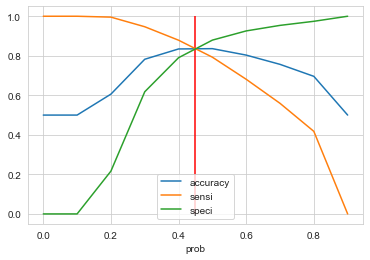

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
%matplotlib inline
cutoffrf_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.45, ymax=1, ymin=0, colors="r", linestyles="-")
plt.show()


In [ ]:
y_res_predrf_final['final_predicted'] = y_res_predrf_final.Churn_Prob.map( lambda x: 1 if x > 0.45 else 0)
y_res_predrf_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.319085,0,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.204337,1,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.165972,2,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.760076,3,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.155986,4,0,1,1,0,0,0,0,0,0,0,0,0


Random Forest (with PCA) Model Stats Scores Summary : 


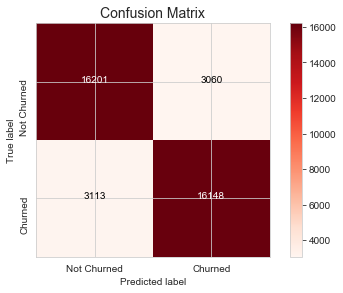

In [ ]:
##Confusion Matrix (optimal train set)
confusion_train_optrf = metrics.confusion_matrix(y_res_predrf_final.Churn, y_res_predrf_final.final_predicted)
print_model_metrics(y_res_predrf_final.Churn, y_res_predrf_final.final_predicted,'Random Forest (with PCA)')

In [ ]:
## Let's compute the Evaluation Metrics (train_data)
printbold('**Evaluation Metrics: Train Set (Optimal Cut-off) ---[using PCA for feature selection]**')
print("******************************************************************")
print('Accuracy of Train Set: (Random Forest Model with PCA):')
print(metrics.accuracy_score(y_res_predrf_final.Churn, y_res_predrf_final.final_predicted))
print("******************************************************************")

from sklearn.metrics import classification_report
print(classification_report(y_res_predrf_final.Churn, y_res_predrf_final.final_predicted, target_names=['Not Churned','Churned']))
print("******************************************************************")

print(other_metrics_logistic_model(confusion_train_optrf))
print("******************************************************************")
print('ROC of Train Set: (Random Forest Model with PCA):')
print("{:2.3}".format(metrics.roc_auc_score(y_res_predrf_final.Churn, y_res_predrf_final.Churn_Prob)))

**Evaluation Metrics: Train Set (Optimal Cut-off) ---[using PCA for feature selection]**

******************************************************************
Accuracy of Train Set: (Random Forest Model with PCA):
0.8397539068584186
******************************************************************
              precision    recall  f1-score   support

 Not Churned       0.84      0.84      0.84     19261
     Churned       0.84      0.84      0.84     19261

    accuracy                           0.84     38522
   macro avg       0.84      0.84      0.84     38522
weighted avg       0.84      0.84      0.84     38522

******************************************************************
                            Value
Evaluation Metrics               
Sensitivity                0.8384
Specificity                0.8411
False Positive Rate        0.1589
Positive Predictive Value  0.8407
Negative Predictive Value  0.8388
Misclassification Rate     0.1602
******************************************************************
ROC of Train Set: (Random Forest Model with PCA):
0.911


**Observations:**<br>After achieving the optimal cut-off we get,<br>(i) `ROC_AUC` of Train Set: `0.911`<br>(ii)`Recall Score` of Train Set:  `0.84`

**Prediction and Evaluation: Test Set**

In [ ]:
##Making predictions on Test Setusing Random Forest Model created
pred_probs_testrf = rf_final.predict_proba(df_test_pca)

In [ ]:
##Getting the predicted values on the test set
y_test_predrf= pred_probs_testrf[:,1]   ##Getting churn probability values(1)
y_test_pred


array([4.29634424e-01, 4.60859772e-05, 5.50356499e-01, ...,
       1.74557217e-01, 2.60846739e-02, 2.98513493e-01])

In [ ]:
y_test_predrf_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_predrf})
y_test_predrf_final['CustID'] = y_test.index    ##CustID is the record index ID
y_test_predrf_final.head()

,Churn,Churn_Prob,CustID
0,0,0.363524,73764
1,0,0.150428,18280
2,0,0.397977,43793
3,0,0.319648,69530
4,0,0.275532,71555


**Optimal cut-off achieved is 0.45. Therefore assigning 1 for probabilities >0.45 else 0.**

In [ ]:
y_test_predrf_final['predicted'] = y_test_predrf_final.Churn_Prob.map(lambda x: 1 if x > 0.45 else 0)  ##optimal cut-off is 0.45
y_test_predrf_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.363524,73764,0
1,0,0.150428,18280,0
2,0,0.397977,43793,0
3,0,0.319648,69530,0
4,0,0.275532,71555,0


Random Forest (with PCA) Model Stats Scores Summary : 


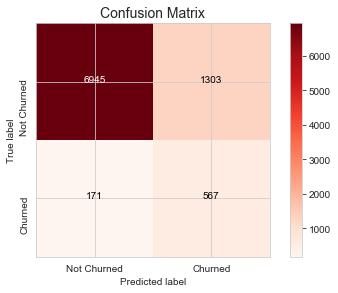

In [ ]:
##Confusion Matrix (optimal test set)
confusion_test_optrf = metrics.confusion_matrix(y_test_predrf_final.Churn, y_test_predrf_final.predicted)
print_model_metrics(y_test_predrf_final.Churn, y_test_predrf_final.predicted, 'Random Forest (with PCA)')

In [ ]:
## Let's compute the Evaluation Metrics (test_data)
printbold('**Evaluation Metrics: Test Set (Optimal Cut-off)---[using PCA for Feature Selection]**')
print("******************************************************************")
print('Accuracy of Test Set: (Random Forest Model with PCA):')
print(metrics.accuracy_score(y_test_predrf_final.Churn, y_test_predrf_final.predicted))
print("******************************************************************")

from sklearn.metrics import classification_report
print(classification_report(y_test_predrf_final.Churn, y_test_predrf_final.predicted, target_names=['Not Churned','Churned']))  # target_names=target_names
print("******************************************************************")

print(other_metrics_logistic_model(confusion_test_optrf))
print("******************************************************************")
print('ROC of Test Set: (Random Forest Model with PCA):')
print("{:2.3}".format(metrics.roc_auc_score(y_test_predrf_final.Churn, y_test_predrf_final.Churn_Prob)))

**Evaluation Metrics: Test Set (Optimal Cut-off)---[using PCA for Feature Selection]**

******************************************************************
Accuracy of Test Set: (Random Forest Model with PCA):
0.8359670598709104
******************************************************************
              precision    recall  f1-score   support

 Not Churned       0.98      0.84      0.90      8248
     Churned       0.30      0.77      0.43       738

    accuracy                           0.84      8986
   macro avg       0.64      0.81      0.67      8986
weighted avg       0.92      0.84      0.87      8986

******************************************************************
                            Value
Evaluation Metrics               
Sensitivity                0.7683
Specificity                0.8420
False Positive Rate        0.1580
Positive Predictive Value  0.3032
Negative Predictive Value  0.9760
Misclassification Rate     0.1640
******************************************************************
ROC of Test Set: (Random Forest Model with PCA):
0.879


**Observations:**<br>After achieving the optimal cut-off we get,<br>(i) `ROC_AUC` of Test Set: `0.879`<br>(ii) `Recall Score` of Test Set:  `0.77`

## <font color='Brown'> (1.3) XGBOOST with PCA

In [ ]:
import xgboost as xgb

In [ ]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',missing =None ,seed = 42)
clf_xgb.fit(df_train_pca,
           y_res,
           verbose=True,
           early_stopping_rounds=10,
           eval_metric = 'auc',
           eval_set =[(df_test_pca,y_test)])

[0]	validation_0-auc:0.787946
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.803228
[2]	validation_0-auc:0.809007
[3]	validation_0-auc:0.827516
[4]	validation_0-auc:0.837989
[5]	validation_0-auc:0.839469
[6]	validation_0-auc:0.843624
[7]	validation_0-auc:0.849732
[8]	validation_0-auc:0.851132
[9]	validation_0-auc:0.855889
[10]	validation_0-auc:0.858242
[11]	validation_0-auc:0.861072
[12]	validation_0-auc:0.862388
[13]	validation_0-auc:0.864158
[14]	validation_0-auc:0.8654
[15]	validation_0-auc:0.86684
[16]	validation_0-auc:0.868909
[17]	validation_0-auc:0.870574
[18]	validation_0-auc:0.872122
[19]	validation_0-auc:0.872809
[20]	validation_0-auc:0.873138
[21]	validation_0-auc:0.875212
[22]	validation_0-auc:0.875987
[23]	validation_0-auc:0.876281
[24]	validation_0-auc:0.876731
[25]	validation_0-auc:0.876821
[26]	validation_0-auc:0.878054
[27]	validation_0-auc:0.878025
[28]	validation_0-auc:0.878476
[29]	validation_0-auc:0.879136
[30]	validation_0-a

XGBClassifier(seed=42)

In [ ]:
xgb_predictions = clf_xgb.predict(df_test_pca)

In [ ]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
# Let's check the report of our default model
print(classification_report(y_test,xgb_predictions,target_names=['Not Churned','Churned']))

              precision    recall  f1-score   support

 Not Churned       0.97      0.87      0.92      8248
     Churned       0.33      0.75      0.46       738

    accuracy                           0.86      8986
   macro avg       0.65      0.81      0.69      8986
weighted avg       0.92      0.86      0.88      8986



In [ ]:
print(accuracy_score(y_test,xgb_predictions))

0.856777208991765


**Hyperparameter Tuning for XGBOOST**

Finding the optimal ranges for hyperparameters for the final gridsearch operation<br>
(i)   Reg_lambda<br>
(ii)  Max_depth<br>
(iii) gamma<br>
(iv)  Learning_Rate<br>
(v) Subsample_Ratio<br>

In [ ]:
param_grid1= {'reg_lambda':range(2,20,4)
             }

optimal_parmas1 = GridSearchCV(
    estimator=xgb.XGBClassifier(objective ='binary:logistic',
                                seed = 42, n_estimators=1000
                               ),
    param_grid=param_grid1,
    scoring='roc_auc',
    verbose = 1,
    n_jobs =-1,
    cv =5,
    return_train_score=True

)

In [ ]:
optimal_parmas1.fit(df_train_pca,
                  y_res,
                  early_stopping_rounds = 10,
                  eval_metric = 'auc',
                  eval_set =[(df_test_pca,y_test)],
                  verbose =False)
print(optimal_parmas1.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.4min finished


{'reg_lambda': 14}


In [ ]:
lambda_score = pd.DataFrame(optimal_parmas1.cv_results_)
lambda_score.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_reg_lambda,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,19.552782,3.693228,0.039434,0.005712,2,{'reg_lambda': 2},0.910090,0.926615,0.919247,0.934381,0.918087,0.921684,0.008232,5,0.927454,0.933763,0.922351,0.936177,0.927132,0.929375,0.004972
1,24.274552,4.167580,0.044990,0.011828,6,{'reg_lambda': 6},0.914328,0.933004,0.925912,0.930962,0.929075,0.926656,0.006591,2,0.932183,0.940141,0.930019,0.931107,0.939880,0.934666,0.004418
2,21.851483,2.850239,0.039753,0.006804,10,{'reg_lambda': 10},0.911876,0.923407,0.923549,0.933199,0.926973,0.923801,0.006940,4,0.929168,0.928752,0.927312,0.934321,0.936806,0.931272,0.003644
3,29.285840,2.200943,0.049772,0.003428,14,{'reg_lambda': 14},0.924155,0.930966,0.931530,0.933339,0.927941,0.929586,0.003224,1,0.943637,0.938166,0.936064,0.935011,0.938131,0.938202,0.002976
4,22.942593,3.129791,0.036379,0.003927,18,{'reg_lambda': 18},0.917606,0.922859,0.930947,0.937371,0.923643,0.926485,0.006906,3,0.936144,0.928638,0.935756,0.939827,0.933455,0.934764,0.003682


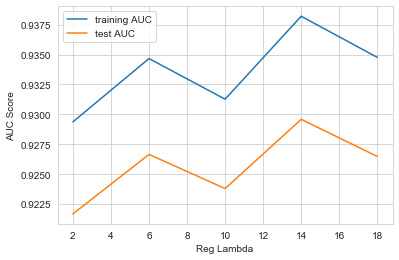

In [ ]:
plt.figure()
plt.plot(lambda_score["param_reg_lambda"],
         lambda_score["mean_train_score"],
         label="training AUC")
plt.plot(lambda_score["param_reg_lambda"],
         lambda_score["mean_test_score"],
         label="test AUC")
plt.xlabel("Reg Lambda")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [ ]:
param_grid2 = {'max_dpth':range(1,20,4)}

optimal_parmas2 = GridSearchCV(
    estimator=xgb.XGBClassifier(objective ='binary:logistic',
                                seed = 42, n_estimators=1000
                               ),
    param_grid=param_grid2,
    scoring='roc_auc',
    verbose = 1,
    n_jobs =10,
    cv =5,
    return_train_score=True

)


optimal_parmas2.fit(df_train_pca,
                  y_res,
                  early_stopping_rounds = 10,
                  eval_metric = 'auc',
                  eval_set =[(df_test_pca,y_test)],
                  verbose =False)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  25 out of  25 | elapsed:  1.4min finished


GridSearchCV(cv=5, estimator=XGBClassifier(n_estimators=1000, seed=42),
             n_jobs=10, param_grid={'max_dpth': range(1, 20, 4)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
print(optimal_parmas2.best_params_)

{'max_dpth': 1}


In [ ]:
max_depth_score = pd.DataFrame(optimal_parmas2.cv_results_)
max_depth_score.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_dpth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,32.432072,8.272032,0.044175,0.006761,1,{'max_dpth': 1},0.919599,0.934839,0.926957,0.927172,0.924955,0.926704,0.004899,1,0.938407,0.94307,0.930691,0.926897,0.935422,0.934898,0.005676
1,33.887510,8.302548,0.051571,0.012267,5,{'max_dpth': 5},0.919599,0.934839,0.926957,0.927172,0.924955,0.926704,0.004899,1,0.938407,0.94307,0.930691,0.926897,0.935422,0.934898,0.005676
2,34.370995,8.839109,0.050372,0.011335,9,{'max_dpth': 9},0.919599,0.934839,0.926957,0.927172,0.924955,0.926704,0.004899,1,0.938407,0.94307,0.930691,0.926897,0.935422,0.934898,0.005676
3,29.701704,4.317791,0.040621,0.008534,13,{'max_dpth': 13},0.919599,0.934839,0.926957,0.927172,0.924955,0.926704,0.004899,1,0.938407,0.94307,0.930691,0.926897,0.935422,0.934898,0.005676
4,22.809581,3.537801,0.034782,0.004914,17,{'max_dpth': 17},0.919599,0.934839,0.926957,0.927172,0.924955,0.926704,0.004899,1,0.938407,0.94307,0.930691,0.926897,0.935422,0.934898,0.005676


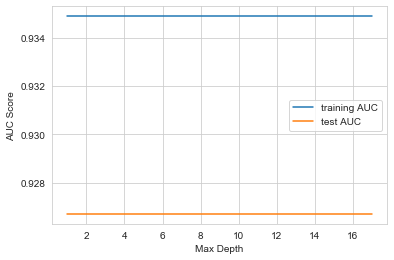

In [ ]:
plt.figure()
plt.plot(max_depth_score["param_max_dpth"],
         max_depth_score["mean_train_score"],
         label="training AUC")
plt.plot(max_depth_score["param_max_dpth"],
         max_depth_score["mean_test_score"],
         label="test AUC")
plt.xlabel("Max Depth")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [ ]:
param_grid3 = {'gamma':[i/10.0 for i in range(0,5)]}

optimal_parmas3 = GridSearchCV(
    estimator=xgb.XGBClassifier(objective ='binary:logistic',
                                seed = 42, n_estimators=1000
                               ),
    param_grid=param_grid3,
    scoring='roc_auc',
    verbose = 1,
    n_jobs =10,
    cv =5,
    return_train_score=True

)


optimal_parmas3.fit(df_train_pca,
                  y_res,
                  early_stopping_rounds = 10,
                  eval_metric = 'auc',
                  eval_set =[(df_test_pca,y_test)],
                  verbose =False)



Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  25 out of  25 | elapsed:  1.4min finished


GridSearchCV(cv=5, estimator=XGBClassifier(n_estimators=1000, seed=42),
             n_jobs=10, param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
gamma_score = pd.DataFrame(optimal_parmas3.cv_results_)
gamma_score.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,26.896675,6.914952,0.050571,0.006083,0,{'gamma': 0.0},0.919599,0.934839,0.926957,0.927172,0.924955,0.926704,0.004899,1,0.938407,0.94307,0.930691,0.926897,0.935422,0.934898,0.005676
1,36.499112,6.555211,0.050771,0.015732,0.1,{'gamma': 0.1},0.919599,0.934839,0.926957,0.927172,0.924955,0.926704,0.004899,1,0.938407,0.94307,0.930691,0.926897,0.935422,0.934898,0.005676
2,33.649782,8.342175,0.043175,0.006397,0.2,{'gamma': 0.2},0.919599,0.934839,0.926957,0.927172,0.924955,0.926704,0.004899,1,0.938407,0.94307,0.930691,0.926897,0.935422,0.934898,0.005676
3,29.669440,3.282660,0.043376,0.006340,0.3,{'gamma': 0.3},0.919599,0.934839,0.926957,0.927172,0.924955,0.926704,0.004899,1,0.938407,0.94307,0.930691,0.926897,0.935422,0.934898,0.005676
4,22.302302,4.835850,0.032982,0.005326,0.4,{'gamma': 0.4},0.919599,0.934839,0.926957,0.927172,0.924955,0.926704,0.004899,1,0.938407,0.94307,0.930691,0.926897,0.935422,0.934898,0.005676


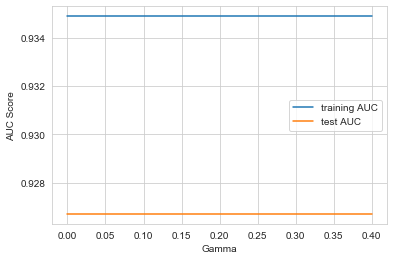

In [ ]:
plt.figure()
plt.plot(gamma_score["param_gamma"],
         gamma_score["mean_train_score"],
         label="training AUC")
plt.plot(gamma_score["param_gamma"],
         gamma_score["mean_test_score"],
         label="test AUC")
plt.xlabel("Gamma")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [ ]:
print(optimal_parmas3.best_params_)

{'gamma': 0.0}


In [ ]:
param_grid4 = {'learning_rate': [i/10.0 for i in range(1,10)]
             }

optimal_parmas4 = GridSearchCV(
    estimator=xgb.XGBClassifier(objective ='binary:logistic',
                                seed = 42, n_estimators=1000
                               ),
    param_grid=param_grid4,
    scoring='roc_auc',
    verbose = 1,
    n_jobs =-1,
    cv =5,
    return_train_score=True

)

optimal_parmas4.fit(df_train_pca,
                  y_res,
                  early_stopping_rounds = 10,
                  eval_metric = 'auc',
                  eval_set =[(df_test_pca,y_test)],
                  verbose =False)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  1.2min finished


GridSearchCV(cv=5, estimator=XGBClassifier(n_estimators=1000, seed=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                           0.8, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
learning_rate_score = pd.DataFrame(optimal_parmas4.cv_results_)
learning_rate_score.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,25.683127,3.959696,0.041630,0.006321,0.1,{'learning_rate': 0.1},0.919599,0.934839,0.926957,0.927172,0.924955,0.926704,0.004899,6,0.938407,0.943070,0.930691,0.926897,0.935422,0.934898,0.005676
1,14.870518,1.796579,0.028518,0.002546,0.2,{'learning_rate': 0.2},0.918267,0.927119,0.931103,0.930887,0.929080,0.927291,0.004736,5,0.936288,0.935646,0.936883,0.932082,0.940123,0.936204,0.002574
2,12.997468,3.672996,0.029983,0.008504,0.3,{'learning_rate': 0.3},0.925941,0.939177,0.930786,0.936991,0.913047,0.929188,0.009320,2,0.946570,0.950679,0.935514,0.939962,0.922270,0.938999,0.009866
3,12.795674,1.799612,0.030982,0.004047,0.4,{'learning_rate': 0.4},0.919804,0.935545,0.935163,0.936905,0.937482,0.932980,0.006643,1,0.940470,0.946915,0.943276,0.941320,0.952367,0.944869,0.004356
4,9.273350,1.835227,0.021216,0.002624,0.5,{'learning_rate': 0.5},0.922157,0.930010,0.921628,0.928646,0.934674,0.927423,0.004941,4,0.944692,0.940821,0.927299,0.930852,0.949008,0.938534,0.008223


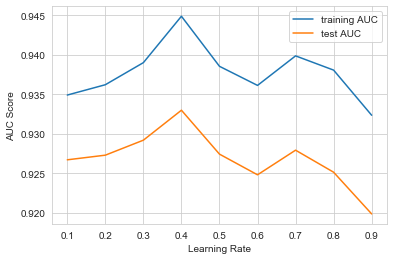

In [ ]:
plt.figure()
plt.plot(learning_rate_score["param_learning_rate"],
         learning_rate_score["mean_train_score"],
         label="training AUC")
plt.plot(learning_rate_score["param_learning_rate"],
         learning_rate_score["mean_test_score"],
         label="test AUC")
plt.xlabel("Learning Rate")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [ ]:
param_grid5 = {'subsample':  [i/10.0 for i in range(4,11)]
             }

optimal_parmas5 = GridSearchCV(
    estimator=xgb.XGBClassifier(objective ='binary:logistic',
                                seed = 42, n_estimators=1000
                               ),
    param_grid=param_grid5,
    scoring='roc_auc',
    verbose = 1,
    n_jobs =-1,
    cv =5,
    return_train_score=True

)

optimal_parmas5.fit(df_train_pca,
                  y_res,
                  early_stopping_rounds = 10,
                  eval_metric = 'auc',
                  eval_set =[(df_test_pca,y_test)],
                  verbose =False)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:  1.6min finished


GridSearchCV(cv=5, estimator=XGBClassifier(n_estimators=1000, seed=42),
             n_jobs=-1,
             param_grid={'subsample': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
subsample_score = pd.DataFrame(optimal_parmas5.cv_results_)
subsample_score.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,17.522675,3.698386,0.051229,0.008391,0.4,{'subsample': 0.4},0.913612,0.936940,0.933498,0.934179,0.929822,0.929610,0.008315,1,0.929959,0.945077,0.936934,0.934874,0.939250,0.937219,0.004983
1,21.092570,6.856258,0.052770,0.011010,0.5,{'subsample': 0.5},0.911294,0.938148,0.940335,0.937536,0.918848,0.929232,0.011843,2,0.927285,0.947142,0.945170,0.939748,0.926713,0.937212,0.008685
2,16.744553,5.366958,0.037620,0.008525,0.6,{'subsample': 0.6},0.914908,0.917839,0.932058,0.920753,0.930367,0.923185,0.006831,7,0.932366,0.921490,0.935417,0.918191,0.939889,0.929471,0.008285
3,21.503969,6.960706,0.047917,0.011065,0.7,{'subsample': 0.7},0.909241,0.935466,0.921926,0.932533,0.934366,0.926706,0.009972,3,0.926666,0.943461,0.924866,0.932621,0.945686,0.934660,0.008521
4,24.073539,6.801556,0.045174,0.009342,0.8,{'subsample': 0.8},0.918700,0.935760,0.931881,0.920872,0.926289,0.926701,0.006435,5,0.936596,0.943690,0.935786,0.919820,0.937109,0.934600,0.007909


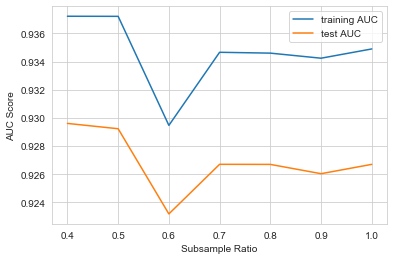

In [ ]:
plt.figure()
plt.plot(subsample_score["param_subsample"],
         subsample_score["mean_train_score"],
         label="training AUC")
plt.plot(subsample_score["param_subsample"],
         subsample_score["mean_test_score"],
         label="test AUC")
plt.xlabel("Subsample Ratio")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [ ]:
print(optimal_parmas5.best_params_)

{'subsample': 0.4}


In [ ]:
optimal_param_grid = {
    'max_dpth':[1,2],
    'learning_rate':[0.3,0.4,0.6],
    'gamma':[0],
    'reg_lambda':[12,13,14],
    'subsample': [0.4,0.6,0.8]
}


optimal_parmas_final = GridSearchCV(
    estimator=xgb.XGBClassifier(objective ='binary:logistic',
                                seed = 42, n_estimators=200
                               ),
    param_grid=optimal_param_grid,
    scoring='roc_auc',
    verbose = 1,
    n_jobs =10,
    cv =5,
    return_train_score=True

)


In [ ]:
optimal_parmas_final.fit(df_train_pca,
                  y_res,
                  early_stopping_rounds = 10,
                  eval_metric = 'auc',
                  eval_set =[(df_test_pca,y_test)],
                  verbose =False)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   48.5s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:  3.8min
[Parallel(n_jobs=10)]: Done 270 out of 270 | elapsed:  5.2min finished


GridSearchCV(cv=5, estimator=XGBClassifier(n_estimators=200, seed=42),
             n_jobs=10,
             param_grid={'gamma': [0], 'learning_rate': [0.3, 0.4, 0.6],
                         'max_dpth': [1, 2], 'reg_lambda': [12, 13, 14],
                         'subsample': [0.4, 0.6, 0.8]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
print(optimal_parmas_final.best_params_)

{'gamma': 0, 'learning_rate': 0.3, 'max_dpth': 1, 'reg_lambda': 13, 'subsample': 0.8}


In [ ]:
# printing the optimal ROC_AUC score and hyperparameters
print('We can get ROC_AUC of',optimal_parmas_final.best_score_,'using',optimal_parmas_final.best_params_)

We can get ROC_AUC of 0.9342192731836654 using {'gamma': 0, 'learning_rate': 0.3, 'max_dpth': 1, 'reg_lambda': 13, 'subsample': 0.8}


In [ ]:
## Creating the model using the above hyperparameters
xgb_final = xgb.XGBClassifier(objective='binary:logistic'
                            ,seed = 42
                            ,learning_rate = 0.3
                            ,gamma = 0
                            ,max_depth =1
                            ,reg_lambda = 13
                            ,subsample = 0.8
                            )

In [ ]:
# fit
xgb_final.fit(df_train_pca, y_res)

XGBClassifier(learning_rate=0.3, max_depth=1, reg_lambda=13, seed=42,
              subsample=0.8)

In [ ]:
predxgb_probs_train = xgb_final.predict_proba(df_train_pca)

In [ ]:
##Getting the predicted values on the train set
y_res_predxgb = predxgb_probs_train[:,1]##Getting churn probability values(1)
y_res_predxgb_final = pd.DataFrame({'Churn':y_res.values, 'Churn_Prob':y_res_predxgb})
y_res_predxgb_final['CustID'] = y_res.index    ##CustID is the record index ID
y_res_predxgb_final.head()

,Churn,Churn_Prob,CustID
0,0,0.107601,0
1,0,0.073766,1
2,0,0.055973,2
3,1,0.768396,3
4,0,0.032932,4


In [ ]:
##Lets assume that the optimal cutoff is 0.5

y_res_predxgb_final['predicted'] = y_res_predxgb_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_res_predxgb_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.107601,0,0
1,0,0.073766,1,0
2,0,0.055973,2,0
3,1,0.768396,3,1
4,0,0.032932,4,0


XGBoost Model (with PCA) Model Stats Scores Summary : 


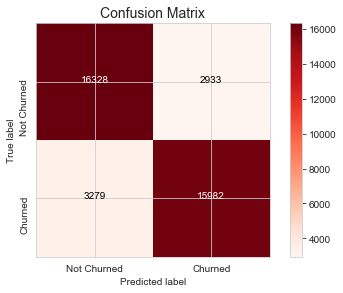

In [ ]:
##Confusion Matrix
confusion = metrics.confusion_matrix(y_res_predxgb_final.Churn, y_res_predxgb_final.predicted)
print_model_metrics(y_res_predxgb_final.Churn, y_res_predxgb_final.predicted, 'XGBoost Model (with PCA)')

In [ ]:
y_res_predxgb_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.107601,0,0
1,0,0.073766,1,0
2,0,0.055973,2,0
3,1,0.768396,3,1
4,0,0.032932,4,0


XGBOOST (with PCA) Model Stats Scores Summary : 


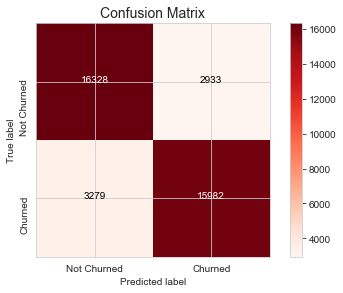

In [ ]:
print_model_metrics(y_res_predxgb_final.Churn, y_res_predxgb_final.predicted,'XGBOOST (with PCA)')

In [ ]:
# Let's check the overall accuracy. (train_data)
print(metrics.roc_auc_score(y_res_predxgb_final.Churn, y_res_predxgb_final.predicted))

0.8387414983645709


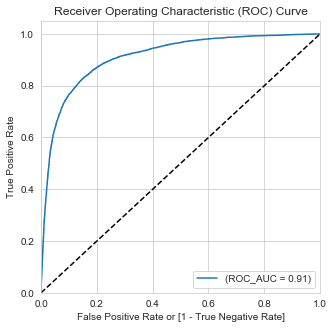

In [ ]:
fpr_xgb, tp_xgb, thresholds_xgb = metrics.roc_curve( y_res_predxgb_final.Churn, y_res_predxgb_final.Churn_Prob, drop_intermediate = False )
##ROC curve for train data
draw_roc(y_res_predxgb_final.Churn, y_res_predxgb_final.Churn_Prob)

In [ ]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_res_predxgb_final[i]= y_res_predxgb_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_res_predxgb_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.107601,0,0,1,1,0,0,0,0,0,0,0,0
1,0,0.073766,1,0,1,0,0,0,0,0,0,0,0,0
2,0,0.055973,2,0,1,0,0,0,0,0,0,0,0,0
3,1,0.768396,3,1,1,1,1,1,1,1,1,1,0,0
4,0,0.032932,4,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
##Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoffxgb_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_res_predxgb_final.Churn, y_res_predxgb_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoffxgb_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoffxgb_df)

     prob  accuracy     sensi     speci
0.0  0.0   0.500000  1.000000  0.000000
0.1  0.1   0.626291  0.991122  0.261461
0.2  0.2   0.736021  0.965526  0.506516
0.3  0.3   0.797337  0.926380  0.668293
0.4  0.4   0.831655  0.886454  0.776855
0.5  0.5   0.838741  0.829760  0.847723
0.6  0.6   0.833368  0.768392  0.898344
0.7  0.7   0.811900  0.688386  0.935414
0.8  0.8   0.764420  0.565028  0.963813
0.9  0.9   0.622450  0.254971  0.989928


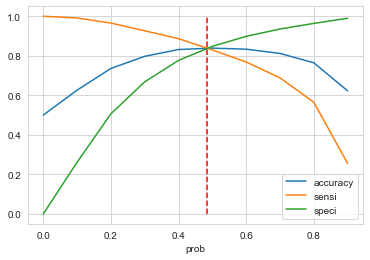

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
%matplotlib inline
cutoffxgb_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.485, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

**Optimal cut-off achieved is 0.485. Assigning churn (1) if probabilities >0.485 else 0.**

In [ ]:
y_res_predxgb_final['final_predicted'] = y_res_predxgb_final.Churn_Prob.map( lambda x: 1 if x > 0.485 else 0)

y_res_predxgb_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.107601,0,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.073766,1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.055973,2,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.768396,3,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.032932,4,0,1,0,0,0,0,0,0,0,0,0,0


XGBOOST (with PCA) Model Stats Scores Summary : 


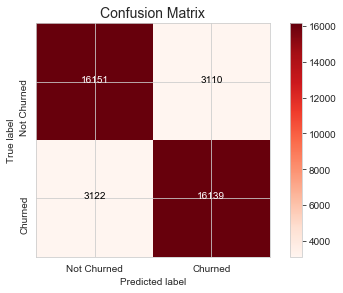

In [ ]:
##Confusion Matrix (optimal train set)
confusion_train_optxgb = metrics.confusion_matrix(y_res_predxgb_final.Churn, y_res_predxgb_final.final_predicted)
print_model_metrics(y_res_predxgb_final.Churn, y_res_predxgb_final.final_predicted,'XGBOOST (with PCA)')

In [ ]:
## Let's compute the Evaluation Metrics (train_data)
printbold('**Evaluation Metrics: Train Set (Optimal Cut-off) ---[using PCA for feature selection]**')
print("******************************************************************")
print('Accuracy of Train Set: (XGBOOST Model with PCA):')
print(metrics.accuracy_score(y_res_predxgb_final.Churn, y_res_predxgb_final.final_predicted))
print("******************************************************************")

from sklearn.metrics import classification_report
print(classification_report(y_res_predxgb_final.Churn, y_res_predxgb_final.final_predicted, target_names=['Not Churned','Churned']))
print("******************************************************************")

print(other_metrics_logistic_model(confusion_train_optxgb))
print("******************************************************************")
print('ROC of Train Set: (XGBOOST Model with PCA):')
print("{:2.3}".format(metrics.roc_auc_score(y_res_predxgb_final.Churn, y_res_predxgb_final.Churn_Prob)))

**Evaluation Metrics: Train Set (Optimal Cut-off) ---[using PCA for feature selection]**

******************************************************************
Accuracy of Train Set: (XGBOOST Model with PCA):
0.8382223145215721
******************************************************************
              precision    recall  f1-score   support

 Not Churned       0.84      0.84      0.84     19261
     Churned       0.84      0.84      0.84     19261

    accuracy                           0.84     38522
   macro avg       0.84      0.84      0.84     38522
weighted avg       0.84      0.84      0.84     38522

******************************************************************
                            Value
Evaluation Metrics               
Sensitivity                0.8379
Specificity                0.8385
False Positive Rate        0.1615
Positive Predictive Value  0.8384
Negative Predictive Value  0.8380
Misclassification Rate     0.1618
******************************************************************
ROC of Train Set: (XGBOOST Model with PCA):
0.912


**Observations:**<br>After using the optimal cut-off we get,<br>(i) `ROC AUC` of Train Set: `0.912`<br>(ii)`Recall Score` of Train Set: `0.84`

**Prediction and Evaluation: Test Set**

In [ ]:
##Making predictions on Test Setusing Random Forest Model created
pred_probs_testxgb = xgb_final.predict_proba(df_test_pca)

In [ ]:
##Getting the predicted values on the test set
y_test_predxgb = pred_probs_testxgb[:,1]   ##Getting churn probability values(1)
y_test_predxgb


array([0.19575453, 0.01938754, 0.46024877, ..., 0.20241885, 0.0500476 ,
       0.22172844], dtype=float32)

In [ ]:
y_test_predxgb_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_predxgb})
y_test_predxgb_final['CustID'] = y_test.index    ##CustID is the record index ID
y_test_predxgb_final.head()

,Churn,Churn_Prob,CustID
0,0,0.195755,73764
1,0,0.019388,18280
2,0,0.460249,43793
3,0,0.334151,69530
4,0,0.075082,71555


In [ ]:
y_test_predxgb_final['predicted'] = y_test_predxgb_final.Churn_Prob.map(lambda x: 1 if x > 0.485 else 0)  ##optimal cut-off is 0.745
y_test_predxgb_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.195755,73764,0
1,0,0.019388,18280,0
2,0,0.460249,43793,0
3,0,0.334151,69530,0
4,0,0.075082,71555,0


XGBOOST (with PCA) Model Stats Scores Summary : 


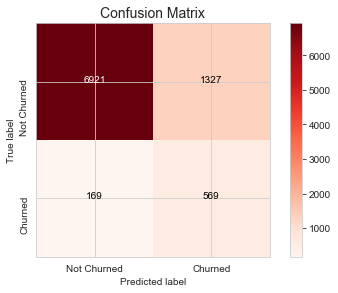

In [ ]:
##Confusion Matrix (optimal test set)
confusion_test_optxgb = metrics.confusion_matrix(y_test_predxgb_final.Churn, y_test_predxgb_final.predicted)
print_model_metrics(y_test_predxgb_final.Churn, y_test_predxgb_final.predicted, 'XGBOOST (with PCA)')

In [ ]:
## Let's compute the Evaluation Metrics (test_data)
printbold('**Evaluation Metrics: Test Set (Optimal Cut-off)---[using PCA for Feature Selection]**')
print("******************************************************************")
print('Accuracy of Test Set: (XGBOOST Model with PCA):')
print(metrics.accuracy_score(y_test_predxgb_final.Churn, y_test_predxgb_final.predicted))
print("******************************************************************")

from sklearn.metrics import classification_report
print(classification_report(y_test_predxgb_final.Churn, y_test_predxgb_final.predicted, target_names=['Not Churned','Churned']))  # target_names=target_names
print("******************************************************************")

print(other_metrics_logistic_model(confusion_test_optxgb))
print("******************************************************************")
print('ROC of Test Set: (XGBOOST Model with PCA):')
print("{:2.3}".format(metrics.roc_auc_score(y_test_predxgb_final.Churn, y_test_predxgb_final.Churn_Prob)))

**Evaluation Metrics: Test Set (Optimal Cut-off)---[using PCA for Feature Selection]**

******************************************************************
Accuracy of Test Set: (XGBOOST Model with PCA):
0.8335188070331627
******************************************************************
              precision    recall  f1-score   support

 Not Churned       0.98      0.84      0.90      8248
     Churned       0.30      0.77      0.43       738

    accuracy                           0.83      8986
   macro avg       0.64      0.81      0.67      8986
weighted avg       0.92      0.83      0.86      8986

******************************************************************
                            Value
Evaluation Metrics               
Sensitivity                0.7710
Specificity                0.8391
False Positive Rate        0.1609
Positive Predictive Value  0.3001
Negative Predictive Value  0.9762
Misclassification Rate     0.1665
******************************************************************
ROC of Test Set: (XGBOOST Model with PCA):
0.878


**Observations:**<br>After using the optimal cut-off we get,<br>(i) `ROC AUC` of Test Set: `0.878`<br>(ii)`Recall Score` of Test Set: `0.771`

### <font color='Brown'> Summary:

### <font color='Green'>Top Features, Business Recommendations and Model Predictions:


#### <font color='Blue'>Top Features

In [ ]:
##Reimporting the 'top15_df' dataframe containing Top 15 features based on their importance in making predictions
top15_df.reset_index(inplace= True)
top15_df.set_index('Rank (Feature Importance Based)')

,Features,Coefficients
Rank (Feature Importance Based),,
1.0,tenure_3_5_year,-2.1444
2.0,tenure_5_12_year,-2.1433
3.0,tenure_2_3_year,-1.7109
4.0,tenure_1_2_year,-1.4500
5.0,loc_ic_t2m_mou_8,-0.9594
6.0,arpu_avg_6_7,0.7388
7.0,spl_ic_mou_8,-0.6885
8.0,total_rech_num_8,-0.6430
9.0,total_rech_data_8,-0.5451


#### <font color='Blue'>Feature Analysis:

(i) **Age on the network (tenure)** is an important factor that determines the churn in High value customers; the longer a customer stays on the network lesser are the chances of him/her churning out. <br><br>
(ii) **Total number of recharges done in the action month(8th month)** is an important indicator for churn of high value customers where less number of recharges in action month are a good indicator for customer churning.<br><br>
(iii) **Minutes of usage (Voice) in the action month** combined is a very good indicator for customer churn. As the MOU in 8th month decreases, the chances of the customer churning out increases.<br><br>
(iv) Churn customers seems to have a relatively **High ARPU (Average Revenue Per User) in the good phase**, indicating that *a sudden downturn in the ARPU* from good to action phase is a major indicator
of the customer churn.<br><br>
(v) **Total and Max data recharges** for customers that churn out seem to be on a **lower** side as compared to that of non churned customers.

#### <font color='Blue'>Business Recommendations:

(i) Recently joined customers (Age on Network: 0-2 years) can be provided addon incentives for a fixed period of time.<br>
(ii) Provide recharge incentives(data + voice) to high value customers in the action phase to help drive customer retention.<br>
(iii) Customer with high ARPU in good phase can be provided usage based incentives to drive up the ARPU in action phase.<br>
(iv) Can provide free or discounted local onnet and mobile usage voice minutes during the action phase.<br>

#### <font color='Blue'>Model Predictions

In [ ]:
##Model Predictions

prediction_results = pd.DataFrame({'Model No.':['1','1.1(i)','1.1(ii)','1.2','1.3'],
                                   'Models':['Logistic Regression (RFE)','Logistic Regression (PCA)',
                                             'Logistic Regression (PCA+Hyperparameter Tuning)',
                                             'Random Forest (PCA+Hyperparameter Tuning)',
                                             'XGBoost (PCA+Hyperparameter Tuning)' ],
                                  'ROC_AUC (Train)':[0.923, 0.91, 0.9097, 0.911, 0.912] ,##Importing values from previous findings
                                   'Recall (Train)':[0.86, 0.84, 0.84, 0.84, 0.84],
                                  'ROC_AUC (Test)':[0.885, 0.896, 0.8962, 0.879, 0.878],
                                  'Recall (Test)':[0.76, 0.80, 0.80, 0.77, 0.771]})
prediction_results.set_index('Model No.', inplace= True)
printbold('**Model Predictions**')
prediction_results

**Model Predictions**

,Models,ROC_AUC (Train),Recall (Train),ROC_AUC (Test),Recall (Test)
Model No.,,,,,
1,Logistic Regression (RFE),0.9230,0.86,0.8850,0.760
1.1(i),Logistic Regression (PCA),0.9100,0.84,0.8960,0.800
1.1(ii),Logistic Regression (PCA+Hyperparameter Tuning),0.9097,0.84,0.8962,0.800
1.2,Random Forest (PCA+Hyperparameter Tuning),0.9110,0.84,0.8790,0.770
1.3,XGBoost (PCA+Hyperparameter Tuning),0.9120,0.84,0.8780,0.771


#### <font color='Green'> Predictions Summary:

Based on the above Prediction Results dataframe we can say that *`Logistic Regression (PCA + Hyperparameter Tuning)`* can be considered as the best model among all as the recall on positive class is the highest for the same. The trend in ROC_AUC of the models also justify the same.